In [82]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
import matplotlib.gridspec as gridspec
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import cross_val_score
from typing import Tuple, List

# Loading the dataframe

In [59]:
df = pd.read_csv('bcw_data.csv')
df = df.drop(columns=['Unnamed: 32'])
print(f'Il y a {len(df.columns)} colonnes dans le dataset')
df.columns

Il y a 32 colonnes dans le dataset


Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [60]:
df.head(10)

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   
5    843786         M        12.45         15.70           82.57      477.1   
6    844359         M        18.25         19.98          119.60     1040.0   
7  84458202         M        13.71         20.83           90.20      577.9   
8    844981         M        13.00         21.82           87.50      519.8   
9  84501001         M        12.46         24.04           83.97      475.9   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760         0.30010              0.14710   
1          0.08474           0.07864         0.08690              0.07017   
2          0.10960           0.15990         0.19740              0.12790   
3          0.14250           0.28390         0.24140              0.10520   
4          0.10030           0.13280         0.19800              0.10430   
5          0.12780           0.17000         0.15780              0.08089   
6          0.09463           0.10900         0.11270              0.07400   
7          0.11890           0.16450         0.09366              0.05985   
8          0.12730           0.19320         0.18590              0.09353   
9          0.11860           0.23960         0.22730              0.08543   

   ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0  ...         25.38          17.33           184.60      2019.0   
1  ...         24.99          23.41           158.80      1956.0   
2  ...         23.57          25.53           152.50      1709.0   
3  ...         14.91          26.50            98.87       567.7   
4  ...         22.54          16.67           152.20      1575.0   
5  ...         15.47          23.75           103.40       741.6   
6  ...         22.88          27.66           153.20      1606.0   
7  ...         17.06          28.14           110.60       897.0   
8  ...         15.49          30.73           106.20       739.3   
9  ...         15.09          40.68            97.65       711.4   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   
5            0.1791             0.5249           0.5355                0.1741   
6            0.1442             0.2576           0.3784                0.1932   
7            0.1654             0.3682           0.2678                0.1556   
8            0.1703             0.5401           0.5390                0.2060   
9            0.1853             1.0580           1.1050                0.2210   

   symmetry_worst  fractal_dimension_worst  
0          0.4601                  0.11890  
1          0.2750                  0.08902  
2          0.3613                  0.08758  
3          0.6638                  0.17300  
4          0.2364                  0.07678  
5          0.3985                  0.12440  
6          0.3063                  0.08368  
7          0.3196                  0.11510  
8          0.4378                  0.10720  
9          0.4366                  0.20750  

[10 rows x 32 columns]

# Data Understanding and Preparation

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [62]:
df.describe()

id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
count     569.000000  ...    569.000000     569.000000       569.000000   
mean        0.181162  ...     16.269190      25.677223       107.261213   
std         0.027414  ...      4.833242       6.146258        33.602542   
min         0.106000  ...      7.930000      12.020000        50.410000   
25%         0.161900  ...     13.010000      21.080000        84.110000   
50%         0.179200  ...     14.970000      25.410000        97.660000   
75%         0.195700  ...     18.790000      29.720000       125.400000   
max         0.304000  ...     36.040000      49.540000       251.200000   

        area_worst  smoothness_worst  compactness_worst  concavity_worst  \
count   569.000000        569.000000         569.000000       569.000000   
mean    880.583128          0.132369           0.254265         0.272188   
std     569.356993          0.022832           0.157336         0.208624   
min     185.200000          0.071170           0.027290         0.000000   
25%     515.300000          0.116600           0.147200         0.114500   
50%     686.500000          0.131300           0.211900         0.226700   
75%    1084.000000          0.146000           0.339100         0.382900   
max    4254.000000          0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  
count            569.000000      569.000000               569.000000  
mean               0.114606        0.290076                 0.083946  
std                0.065732        0.061867                 0.018061  
min                0.000000        0.156500                 0.055040  
25%                0.064930        0.250400                 0.071460  
50%                0.099930        0.282200                 0.080040  
75%                0.161400        0.317900                 0.092080  
max                0.291000        0.663800                 0.207500  

[8 rows x 31 columns]

## checking for null values

In [63]:
print(f'There is {df.isnull().sum().sum()} missing values in the dataset')

There is 0 missing values in the dataset


Seems that there is no null values in the data set

## checking for duplicated values

In [64]:
print(f' There is {df.duplicated().sum()} duplicated values in the dataset')

 There is 0 duplicated values in the dataset


In [65]:
# Drop the id column because it is not relevant for the study
df = df.drop(columns=['id'])

# Analysis of the Data set

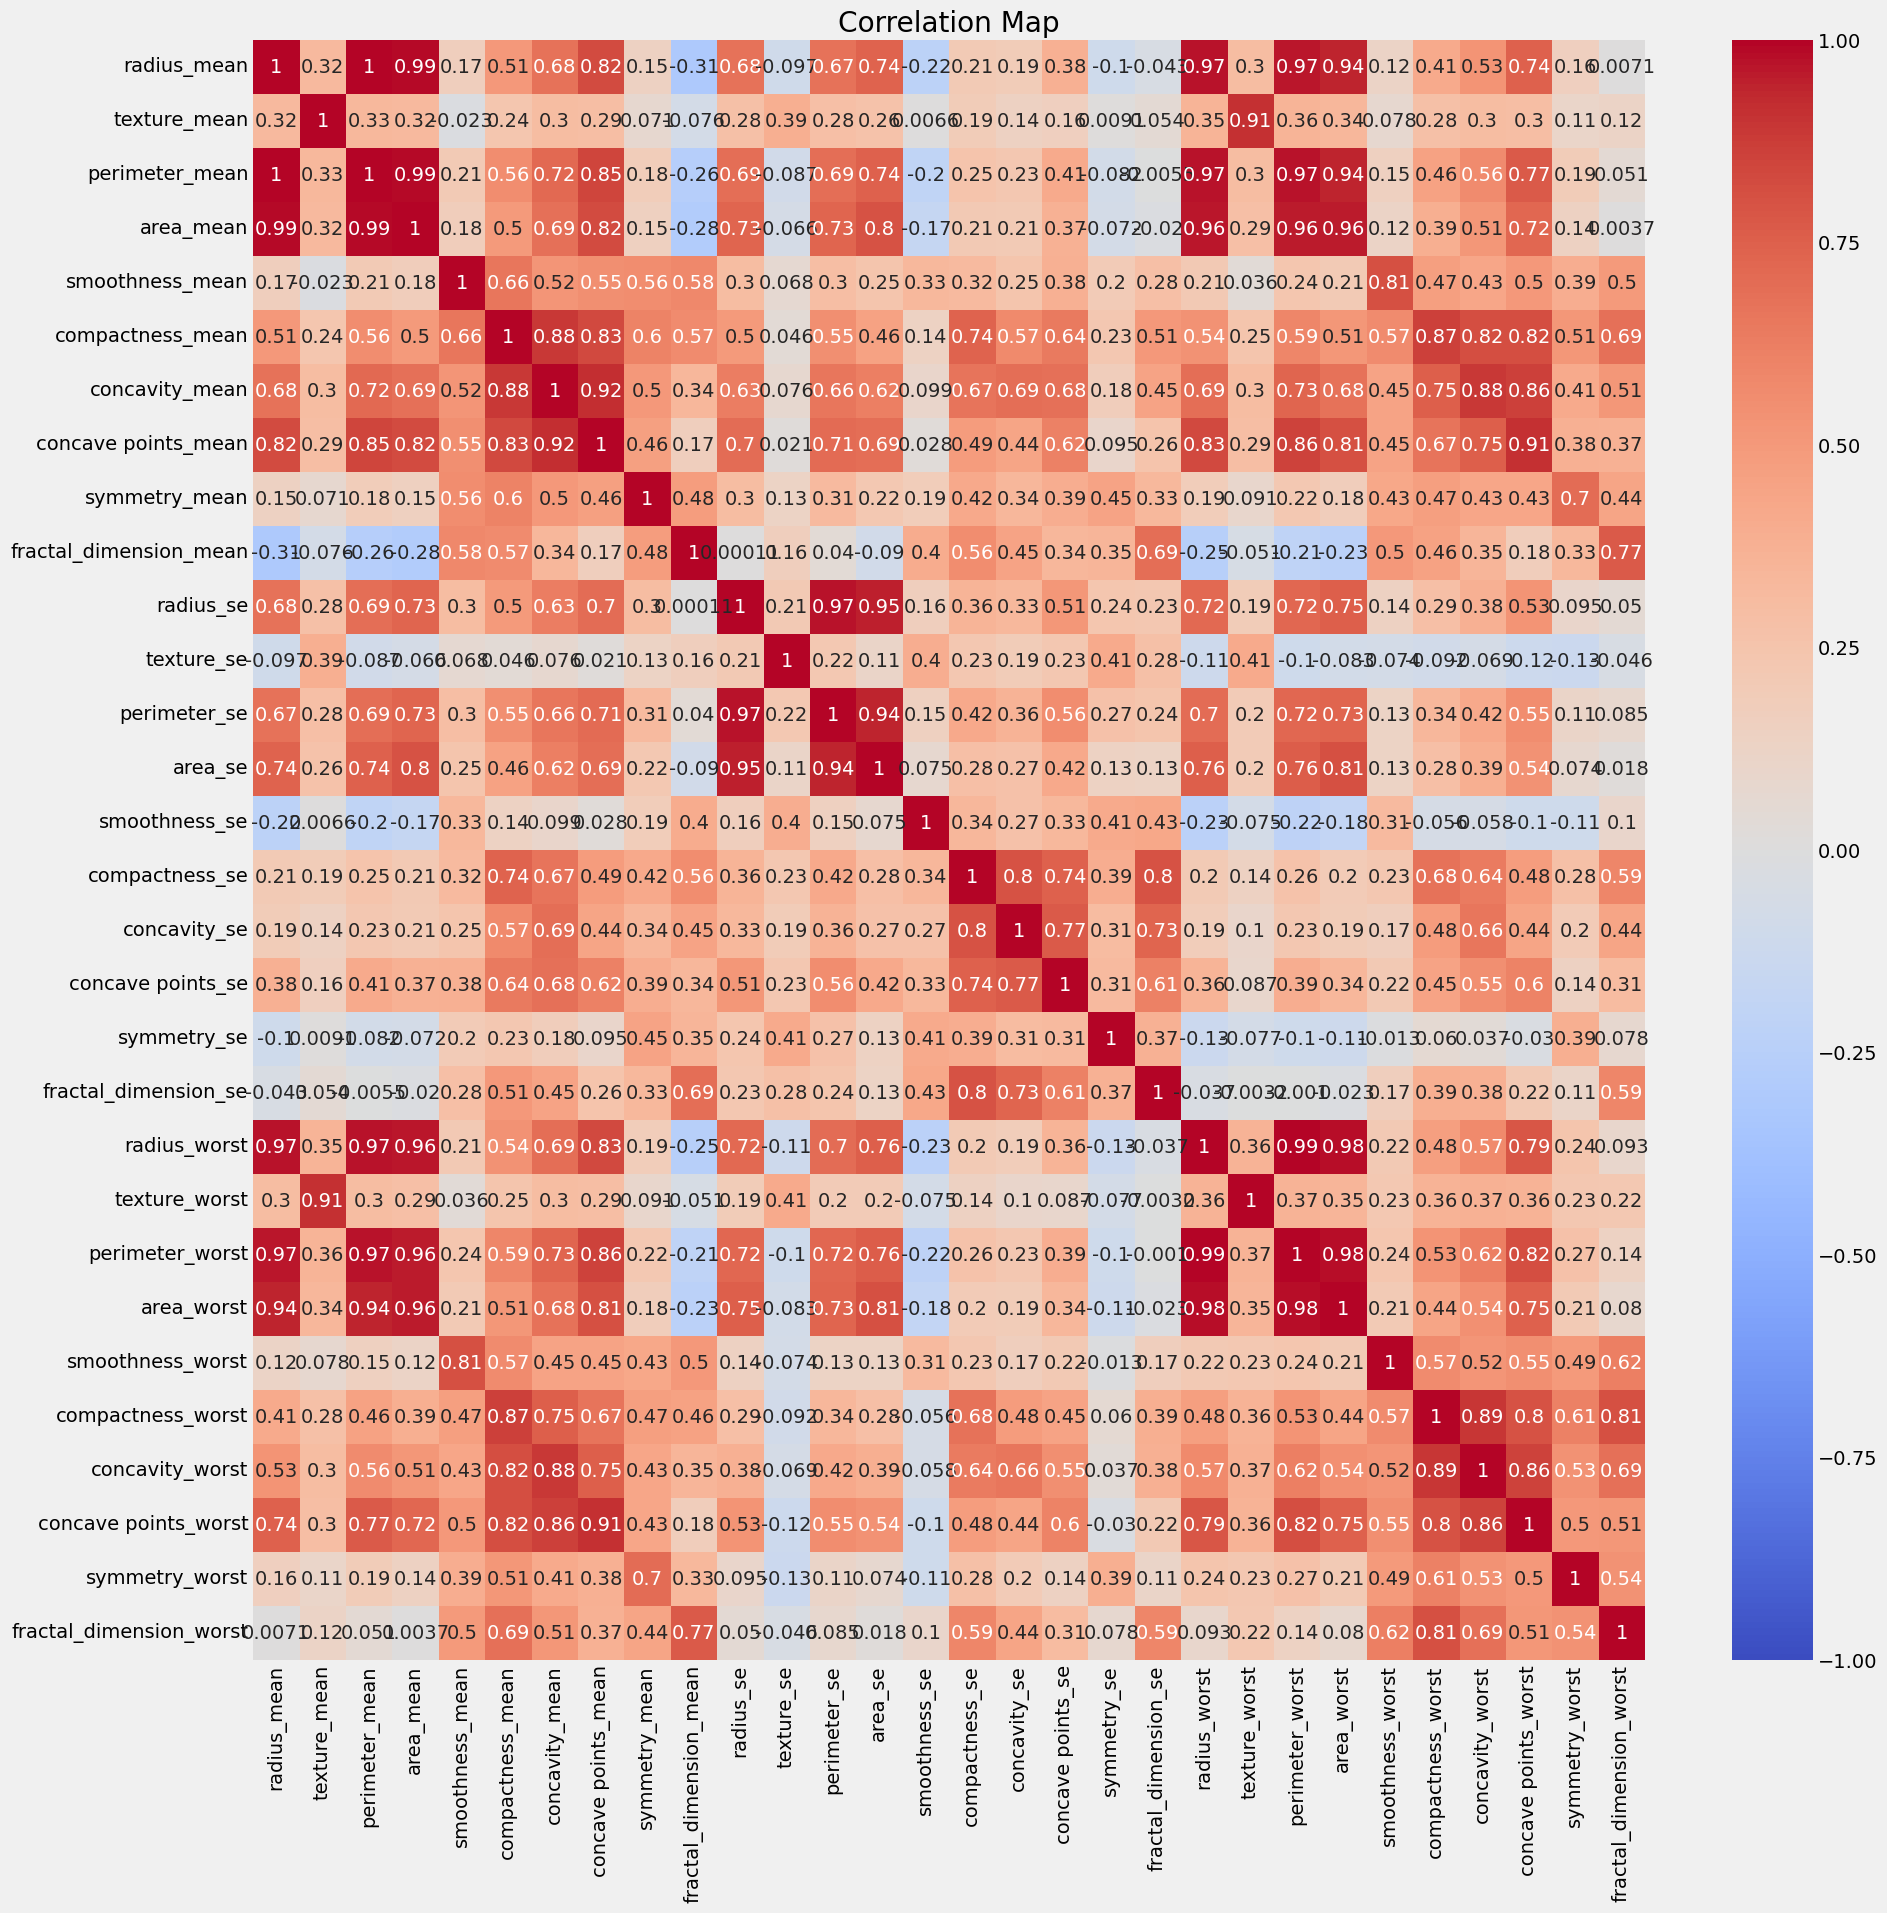

In [66]:
#Taking the resuslt column as the target column 
y = df.pop('diagnosis')

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(20, 20))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Add title
plt.title('Correlation Map')

# Show the plot
plt.show()

Il y a 24 colonnes dans le dataset


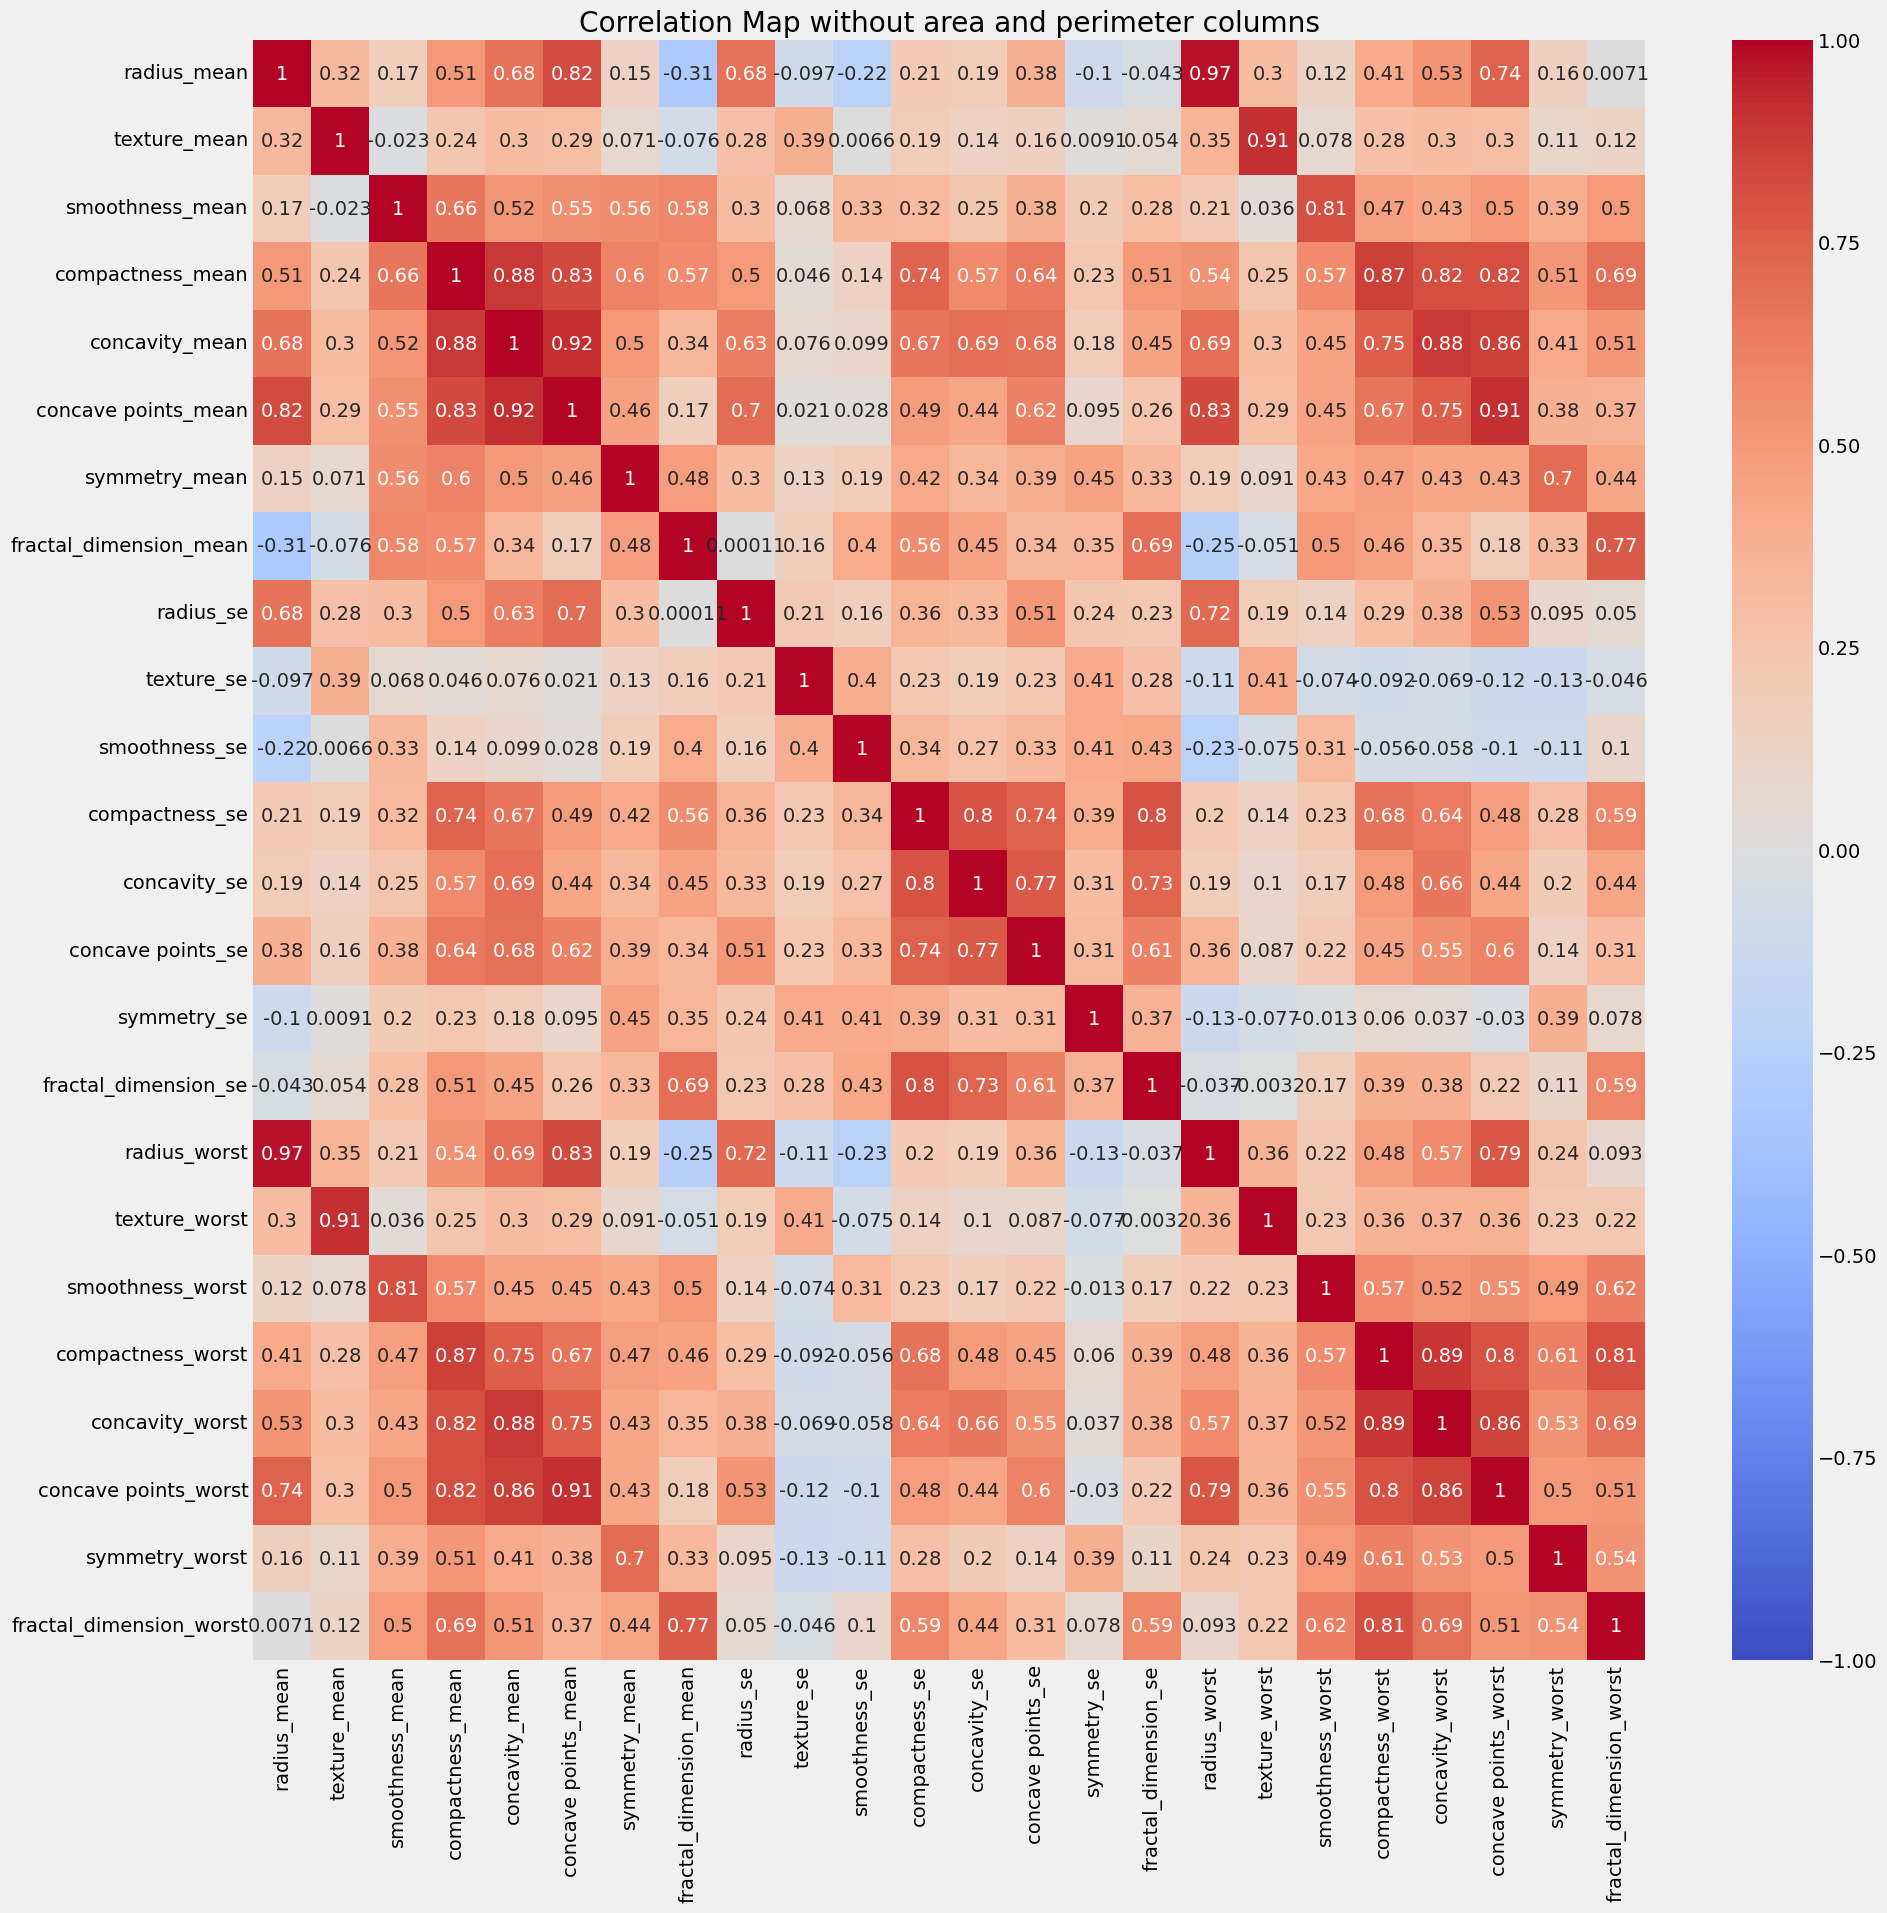

In [67]:
# Remove all the area and perimeter columns
df = df.drop(columns=['area_mean', 'area_se', 'area_worst', 'perimeter_mean', 'perimeter_se', 'perimeter_worst'])
print(f'Il y a {len(df.columns)} colonnes dans le dataset')
df.columns

# The correlation matrix
correlation_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(20, 20))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Add title
plt.title('Correlation Map without area and perimeter columns')
plt.show()

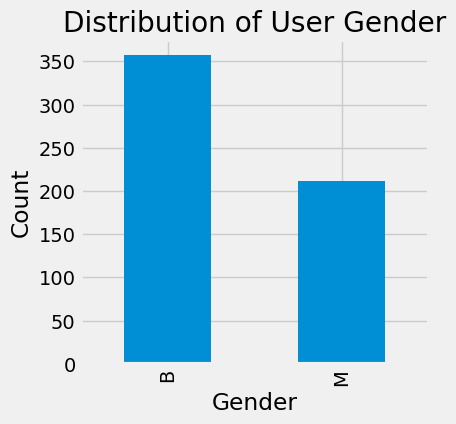

In [68]:
counts = y.value_counts()

# Plot
plt.figure(figsize=(4, 4))
counts.plot(kind='bar')
plt.title('Distribution of User Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

**Commentaire :**
La distribution des classes est déséquilibrée. Il y a plus de cas bénins que de cas malins.
Il faudrait faire une amputation de donnée


## Visualisation of the valuable data

In [69]:
def plotting_3_chart(df_normalized, feature):
    style.use('fivethirtyeight')
    fig = plt.figure(constrained_layout=True, figsize=(15,10))
    grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)

    ax1 = fig.add_subplot(grid[0, :2])
    ax1.set_title('Histogram')
    sns.distplot(df_normalized.loc[:,feature], norm_hist=True, ax = ax1)

    ax2 = fig.add_subplot(grid[1, :2])

    ax2.set_title('QQ_plot')
    stats.probplot(df_normalized.loc[:,feature], plot = ax2)

    ax3 = fig.add_subplot(grid[:, 2])
    ax3.set_title('Box Plot')
    sns.boxplot(df_normalized.loc[:,feature], orient='v', ax = ax3 );

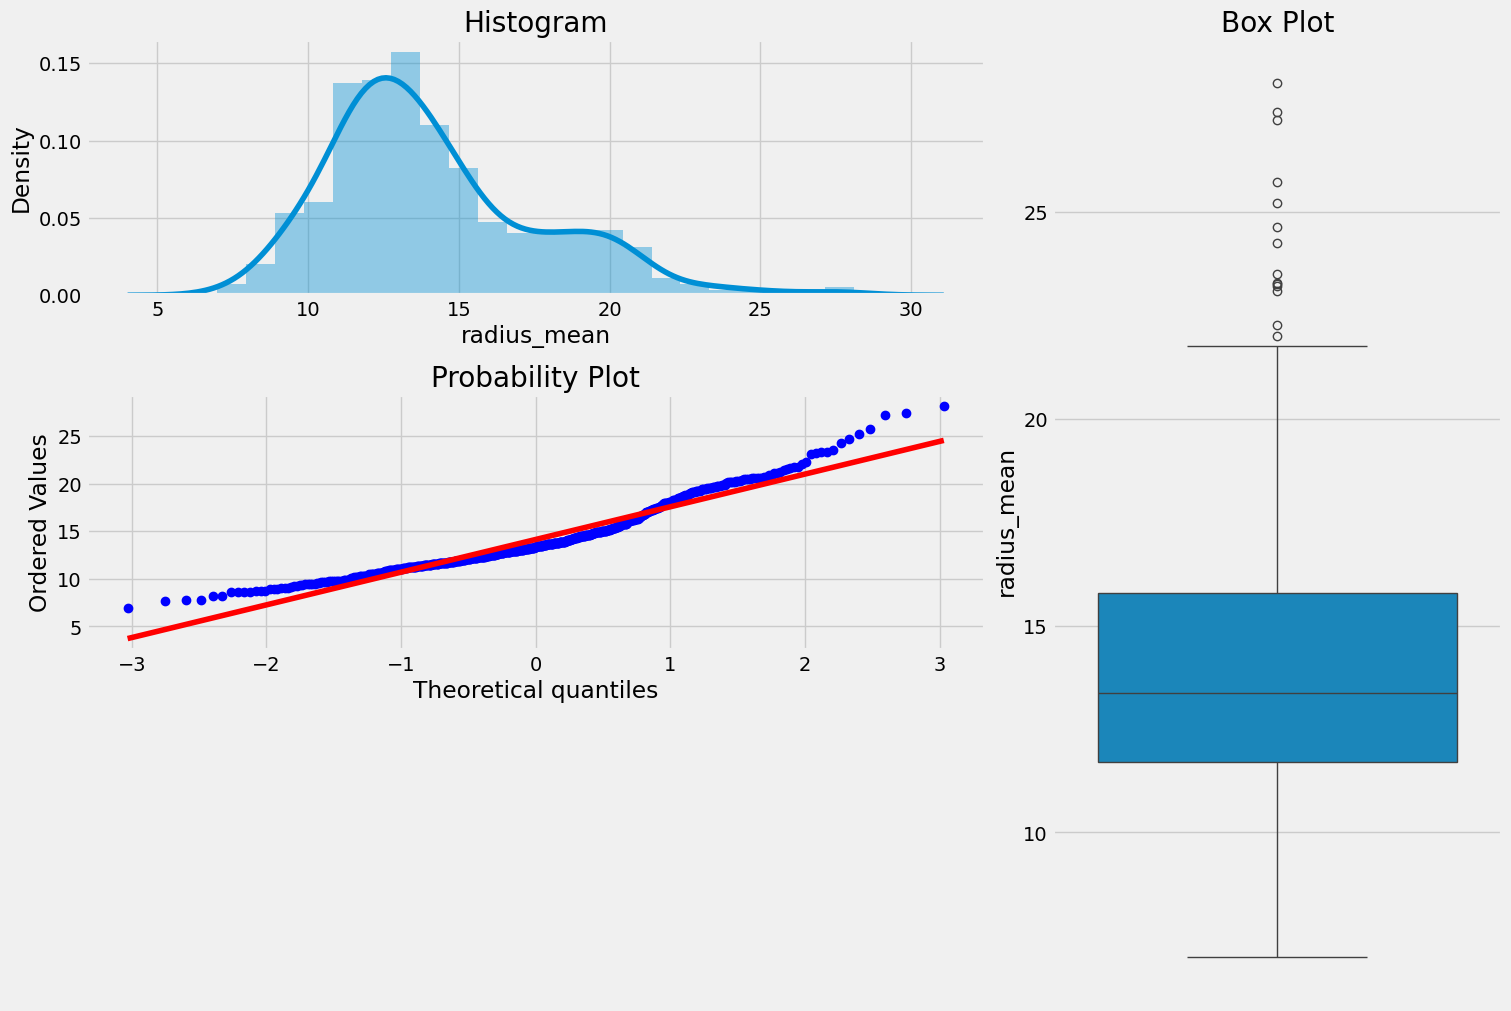

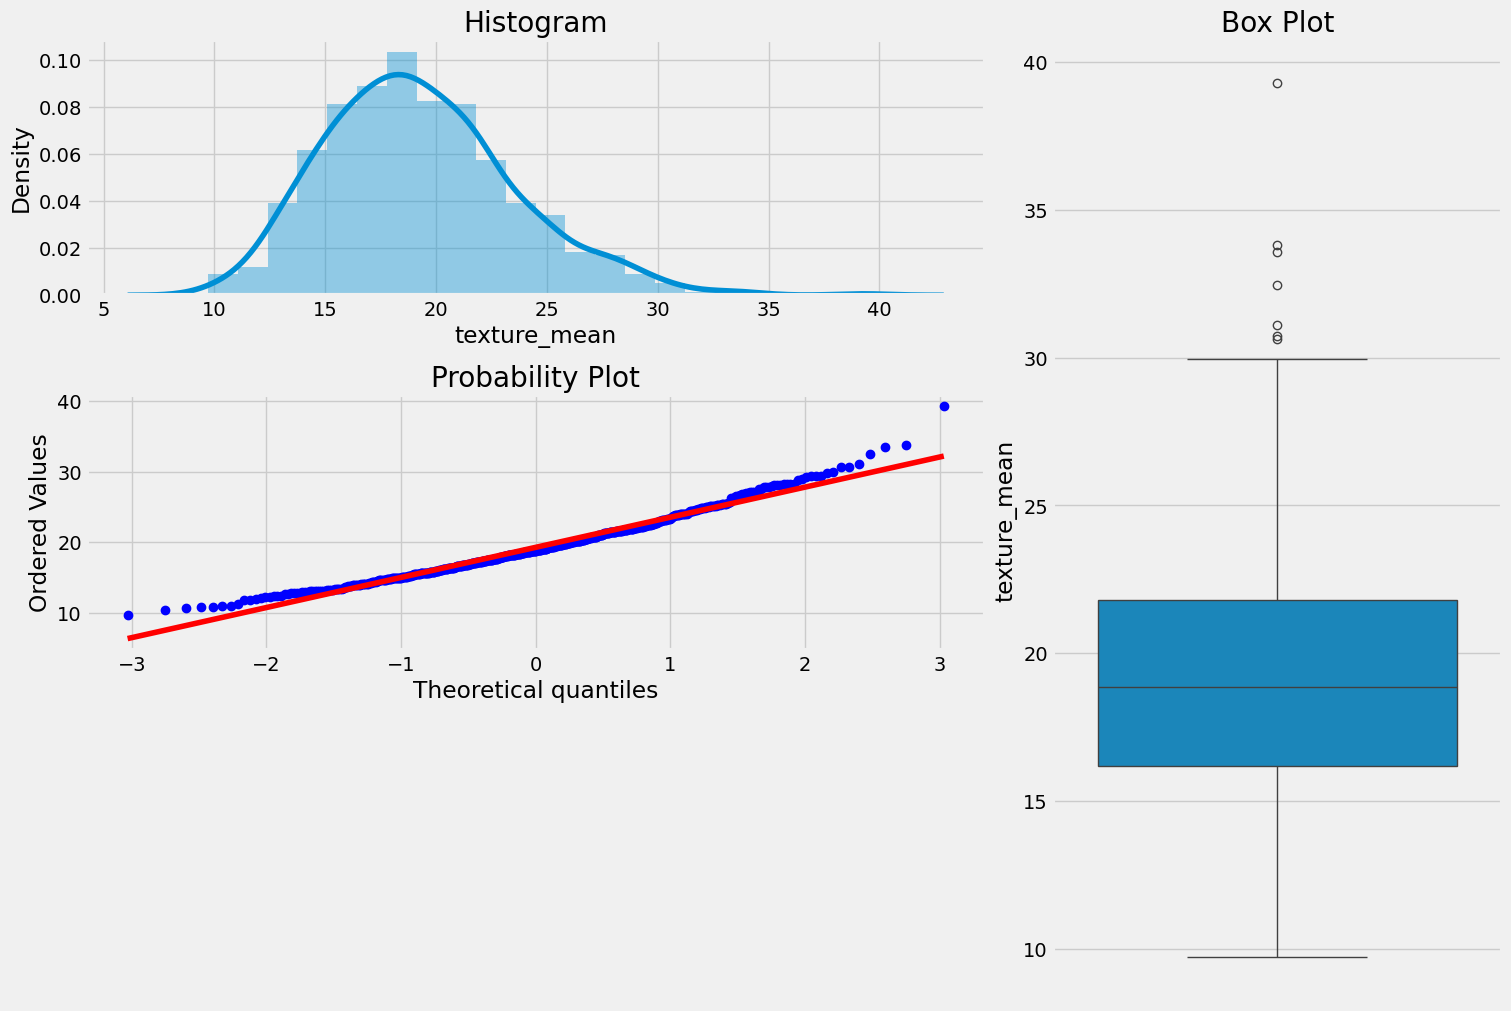

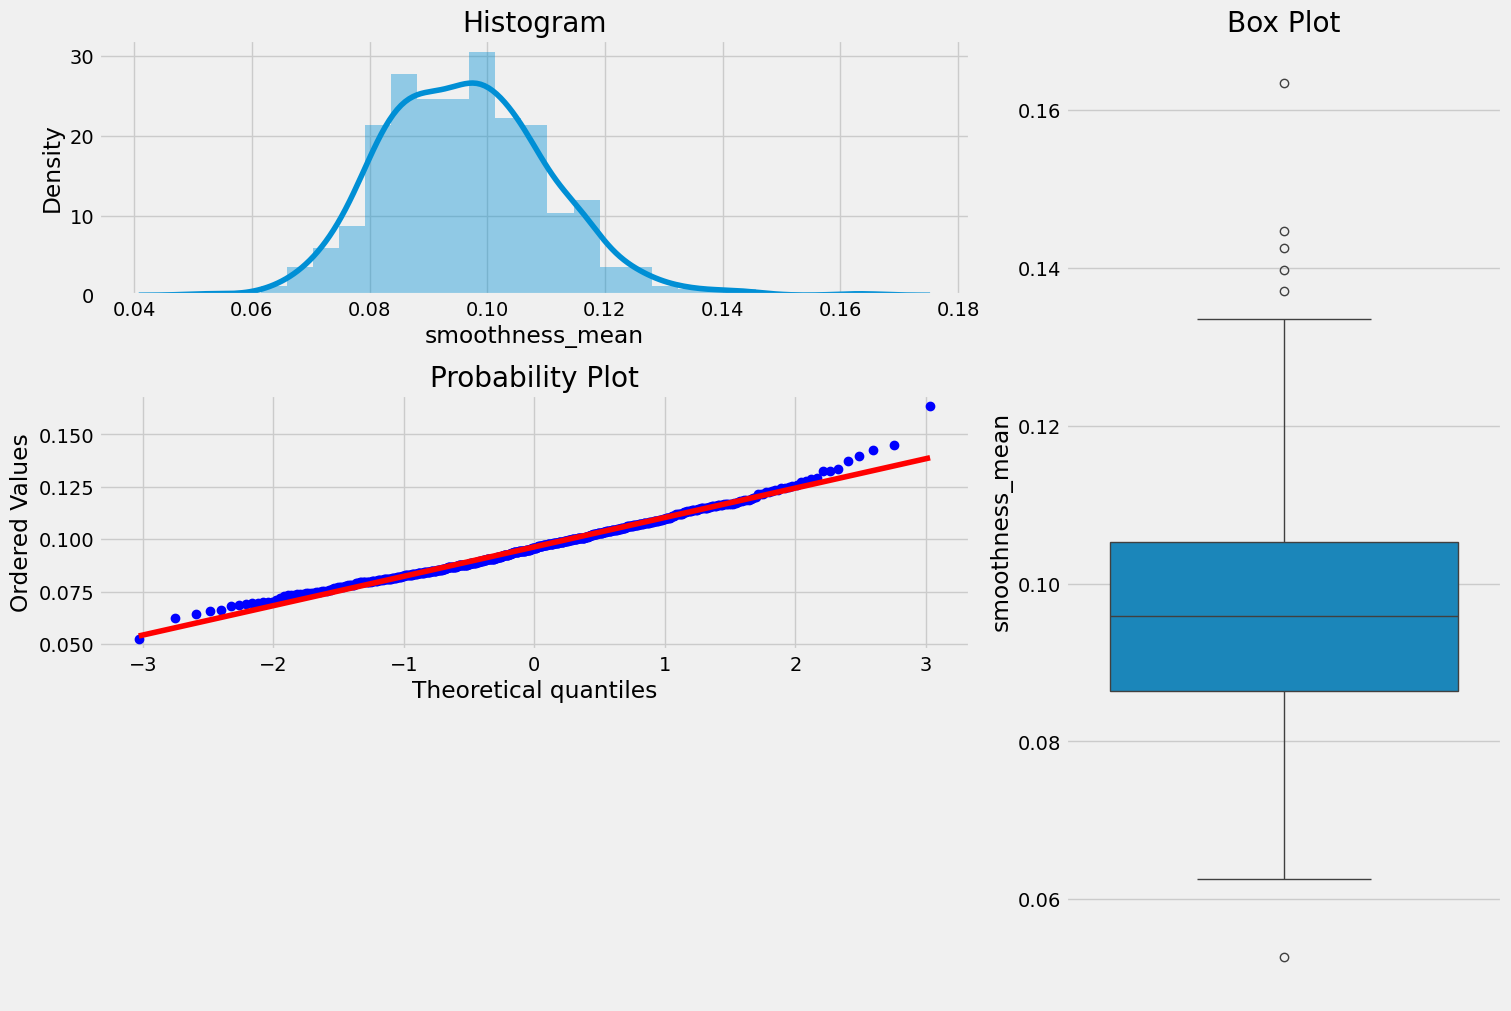

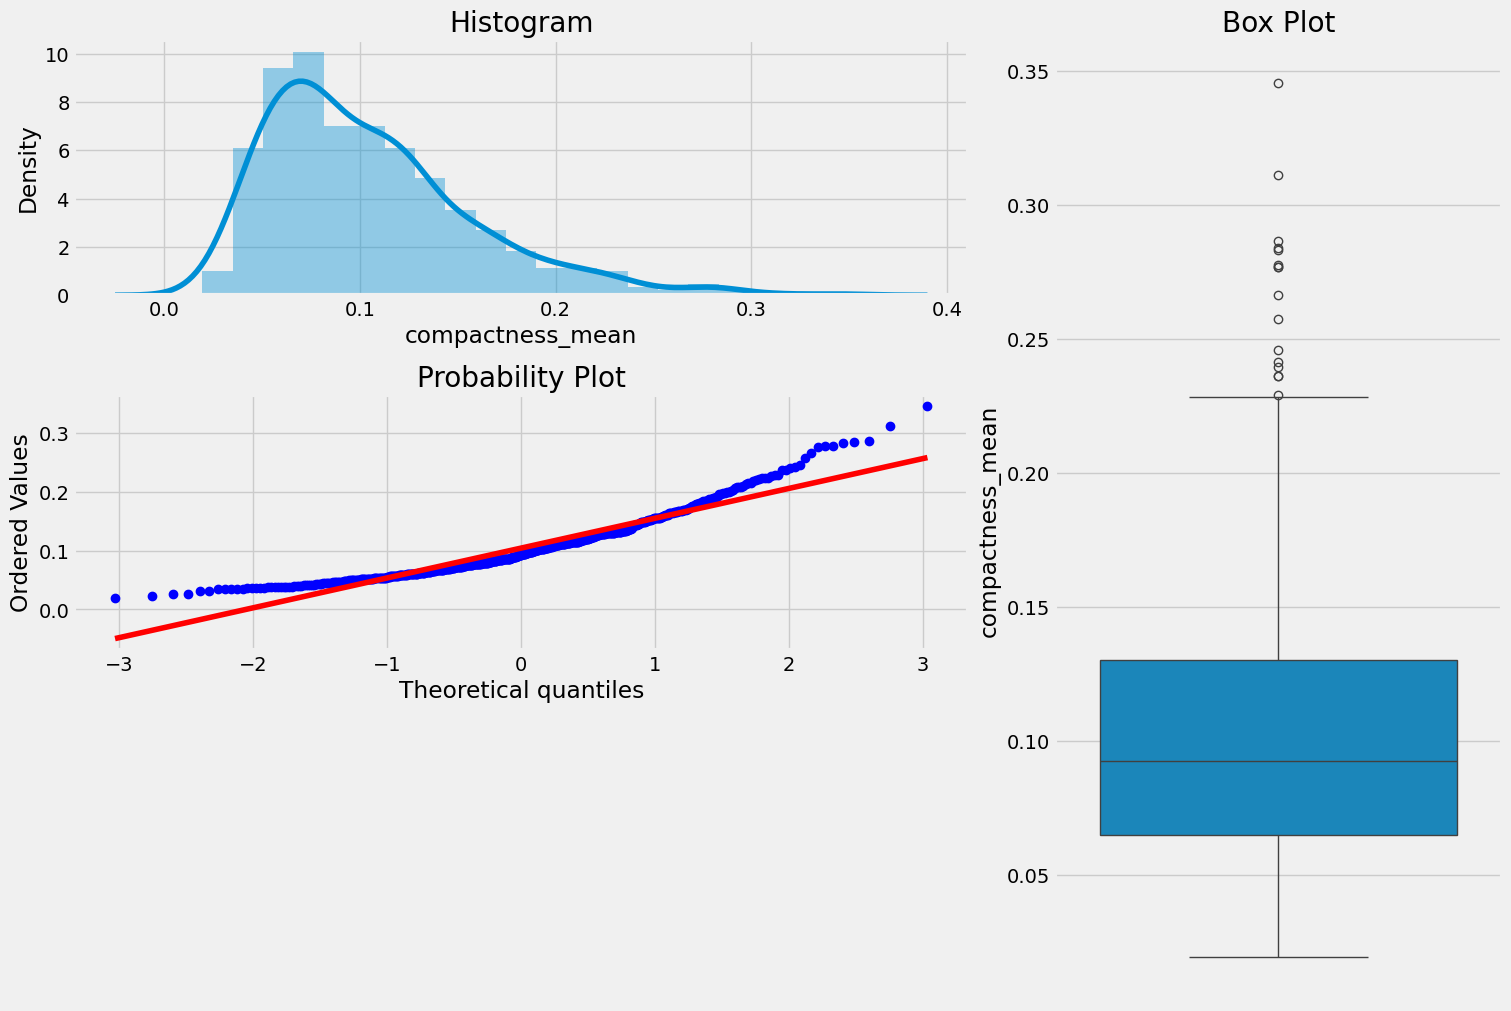

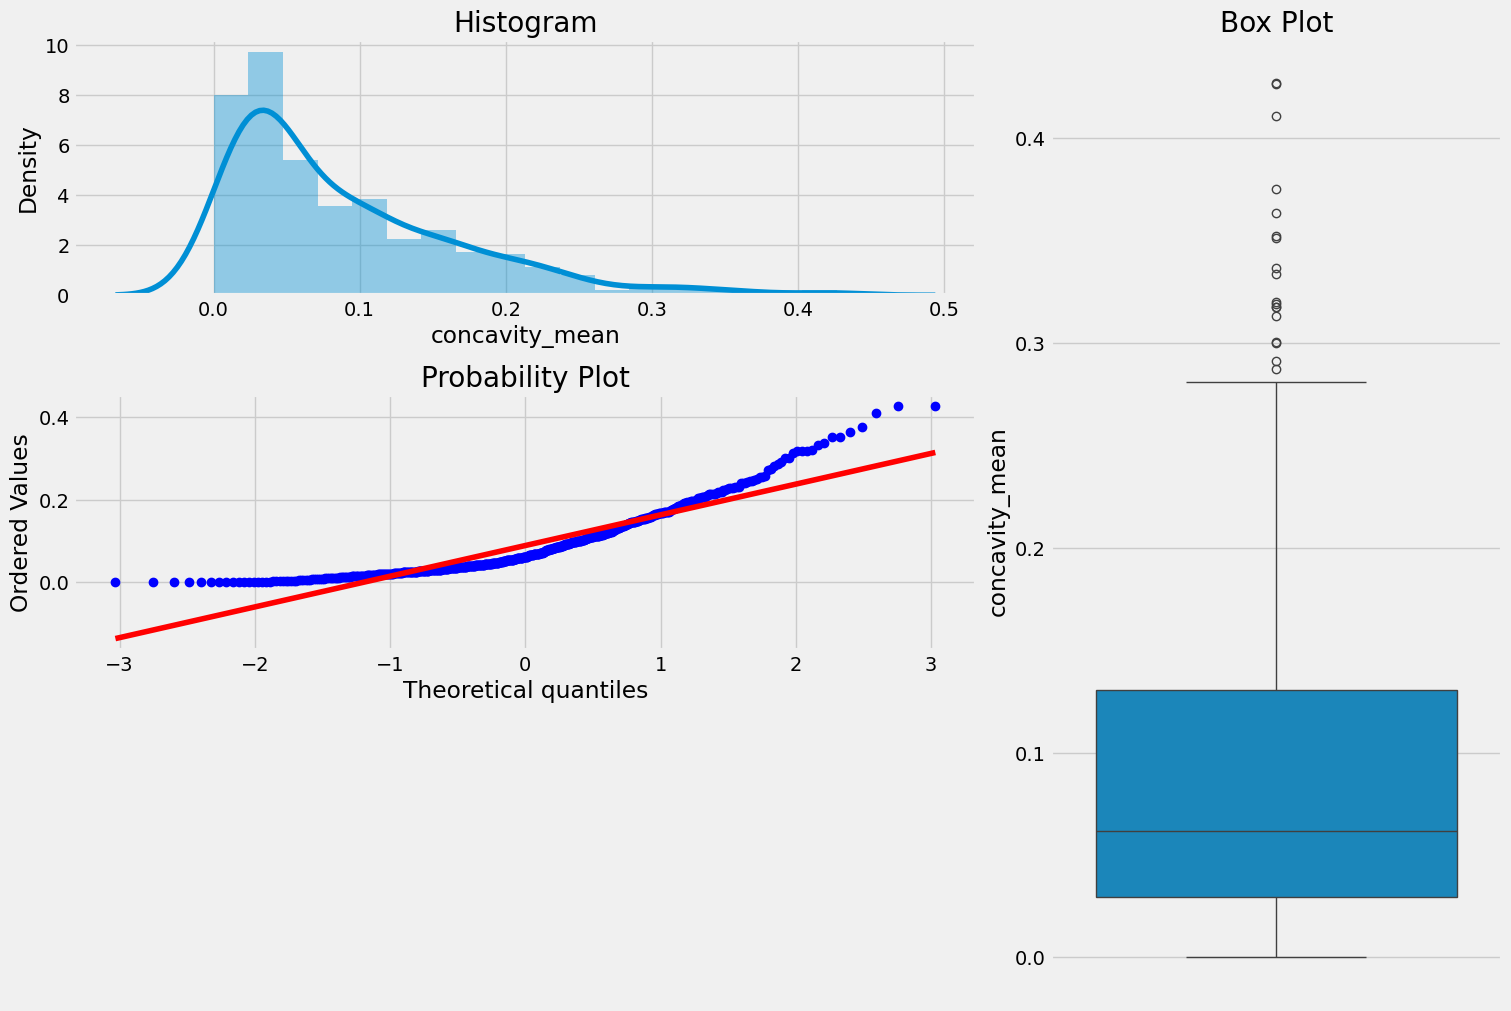

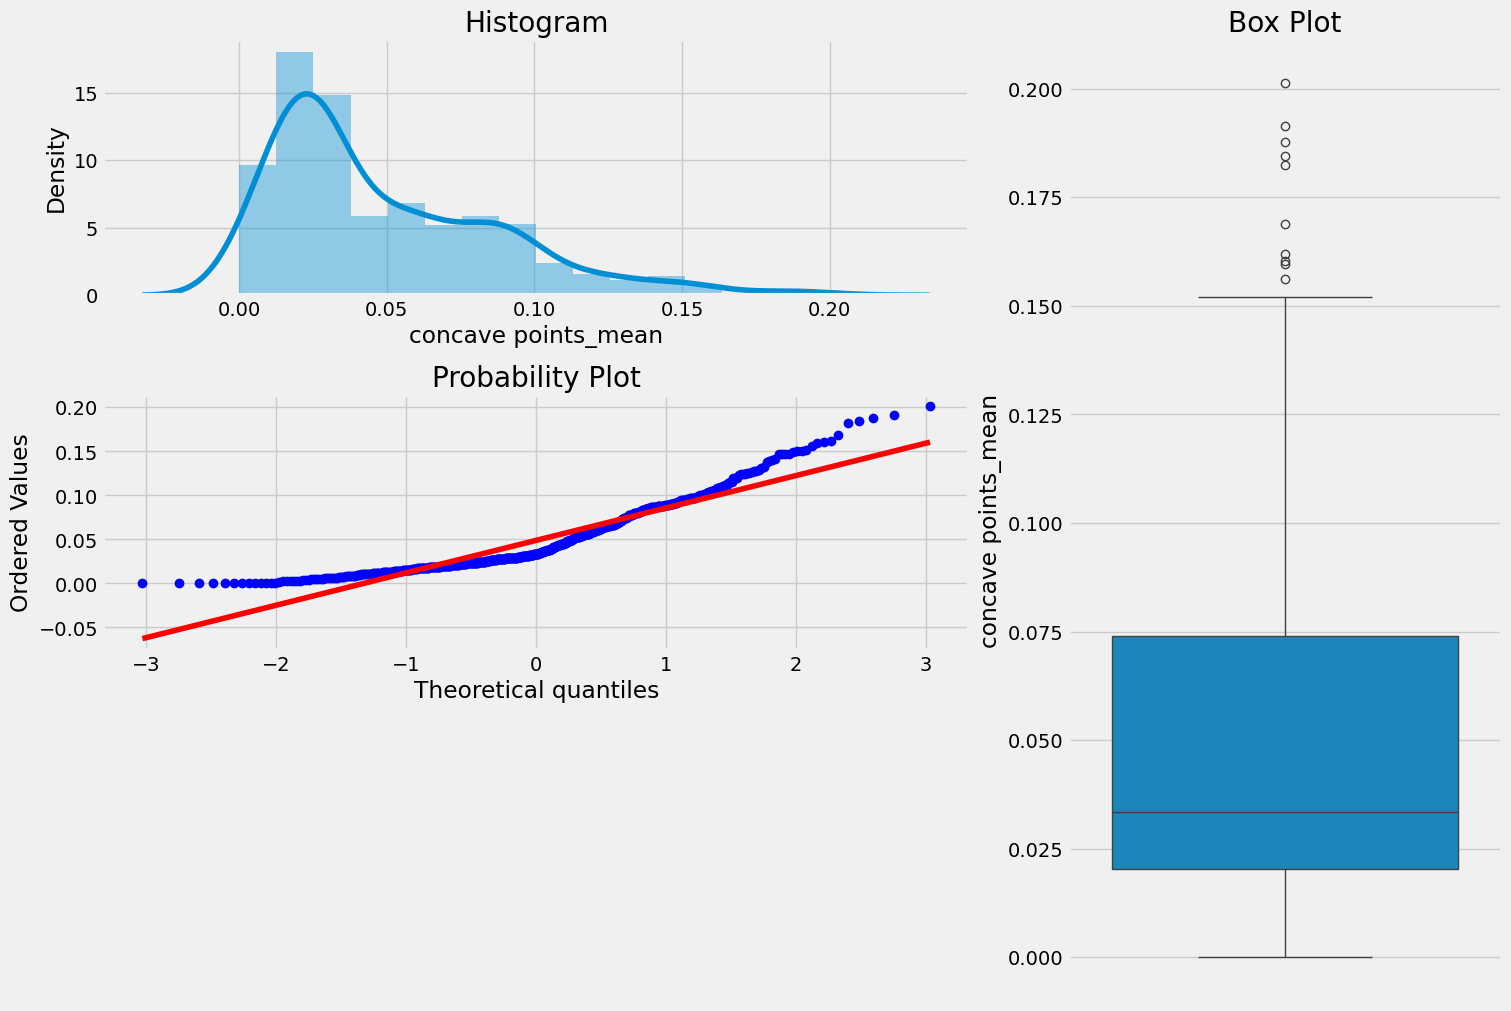

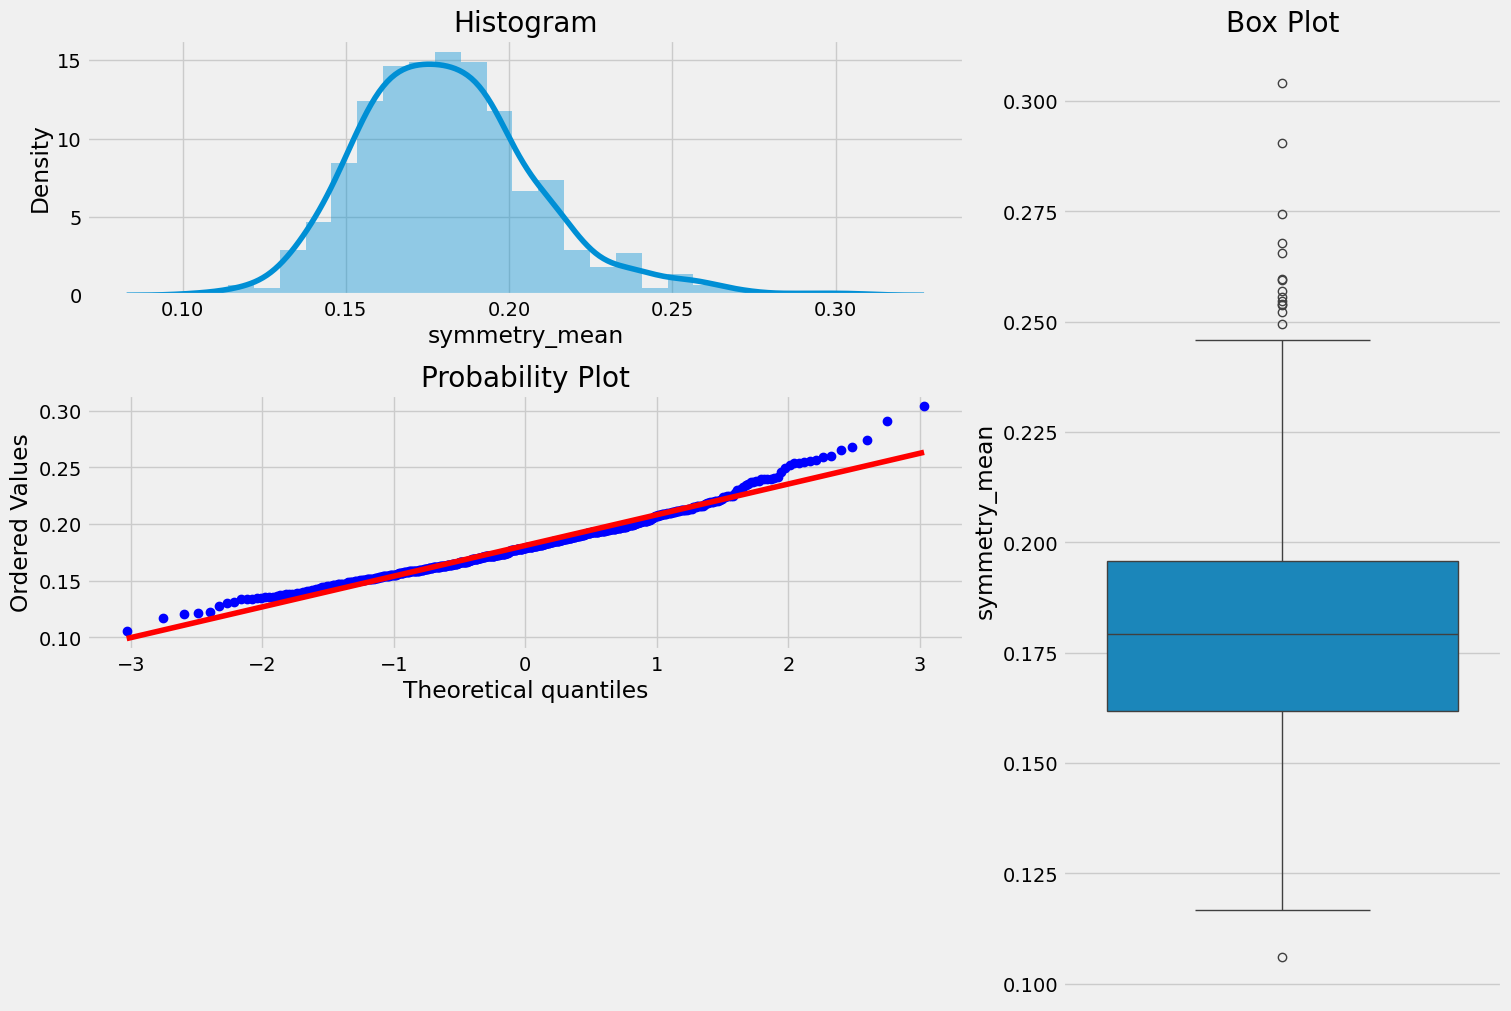

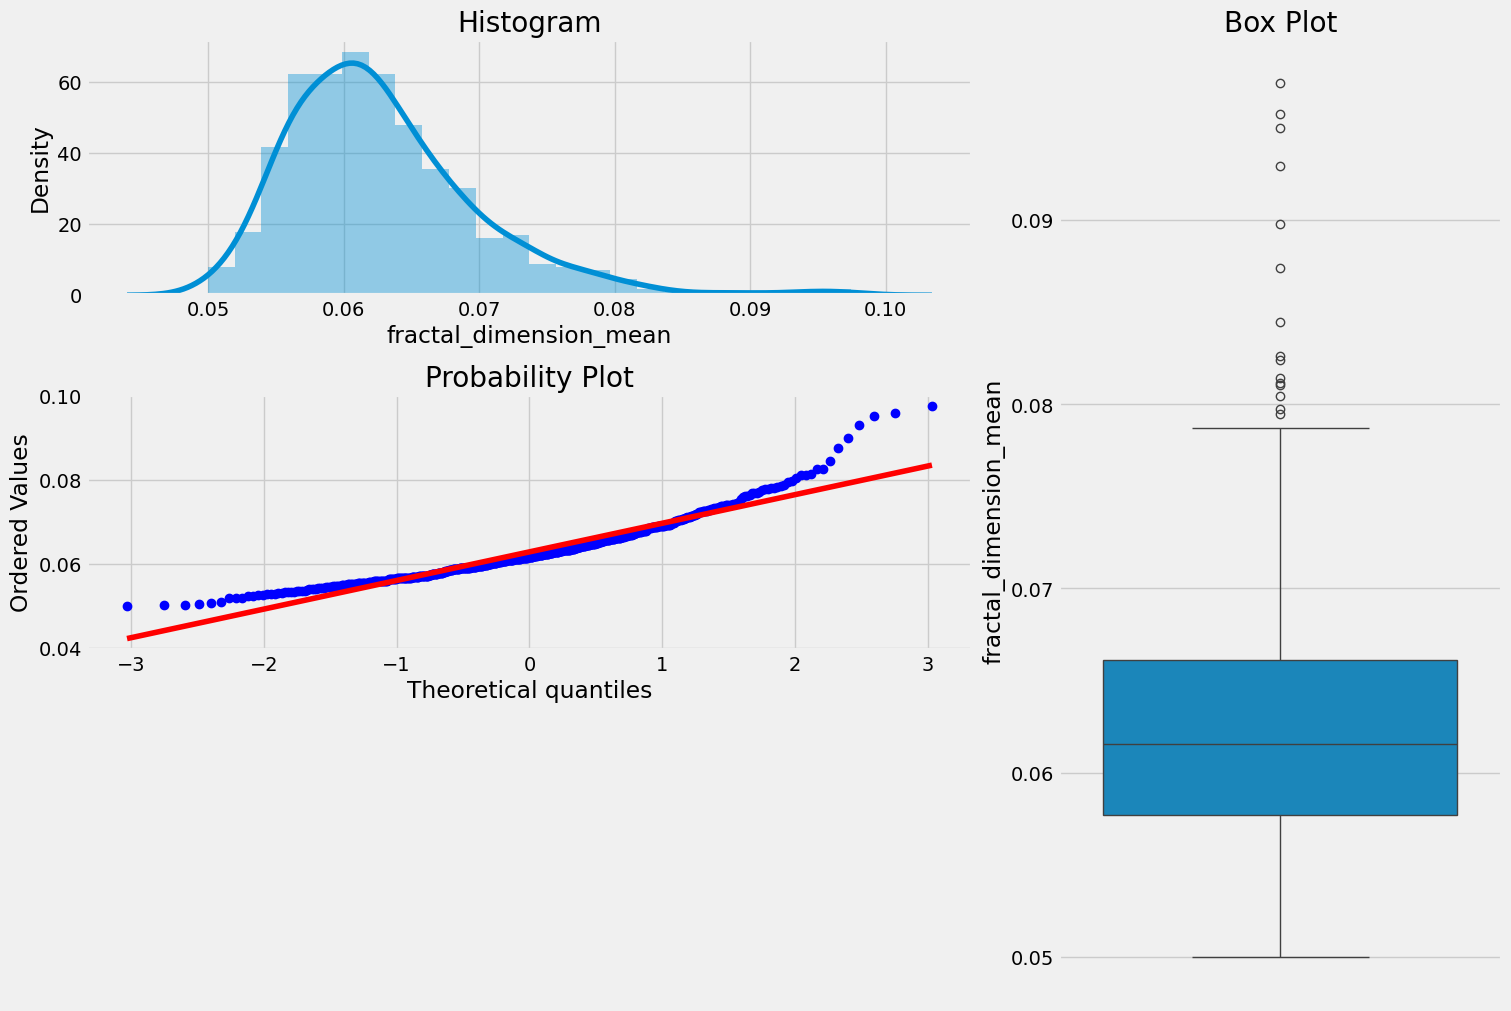

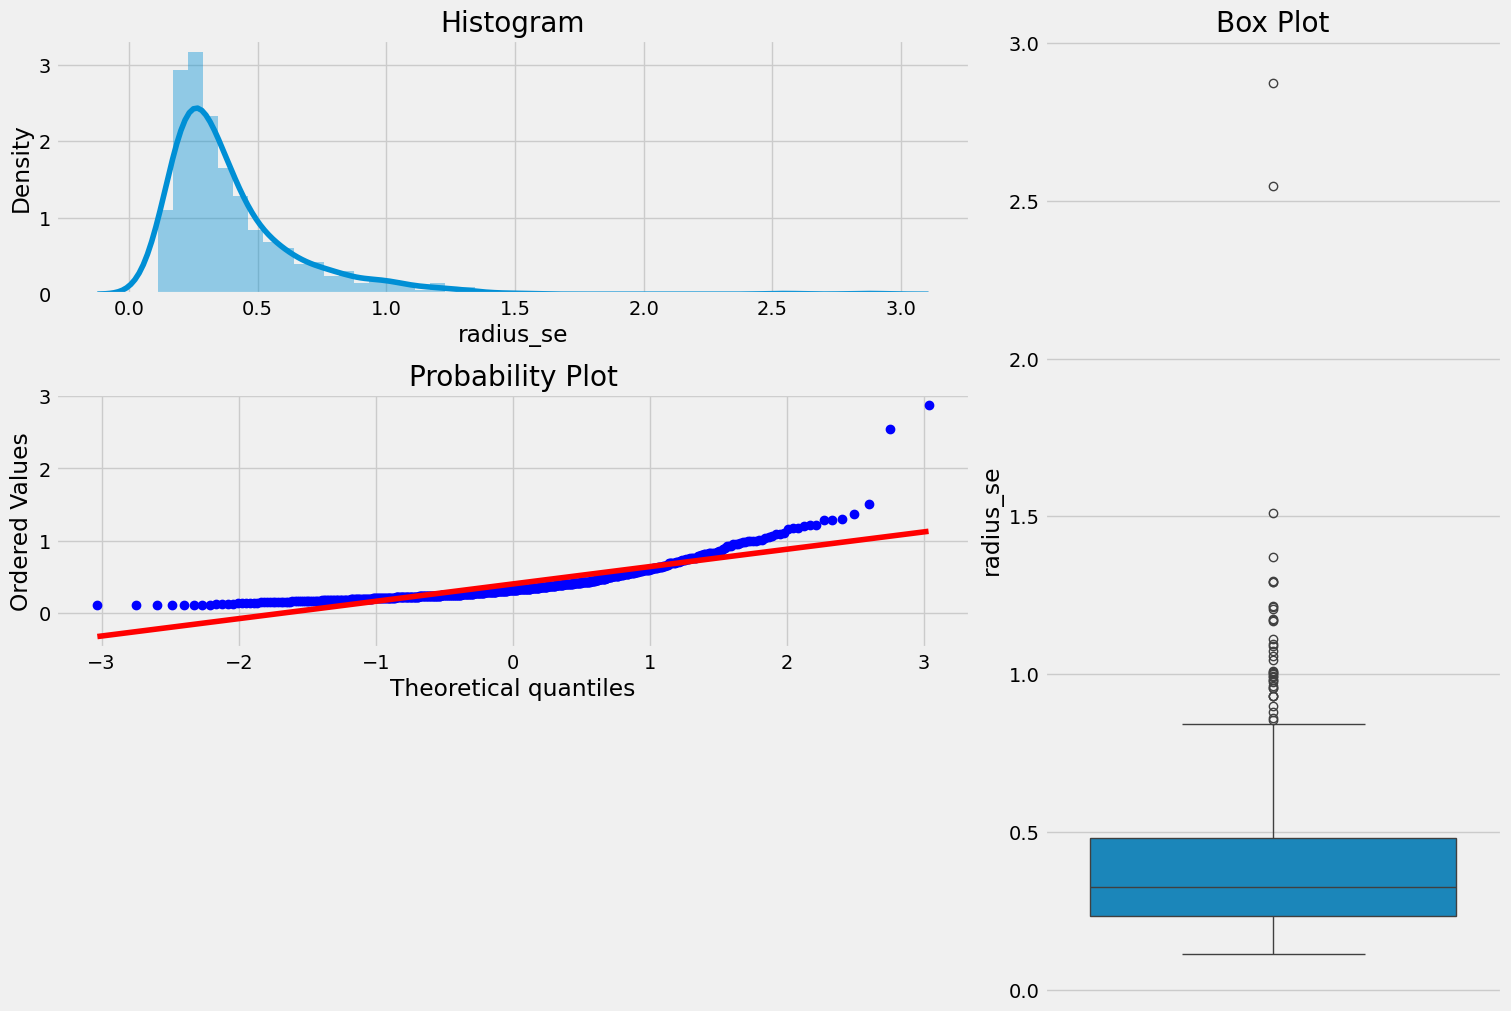

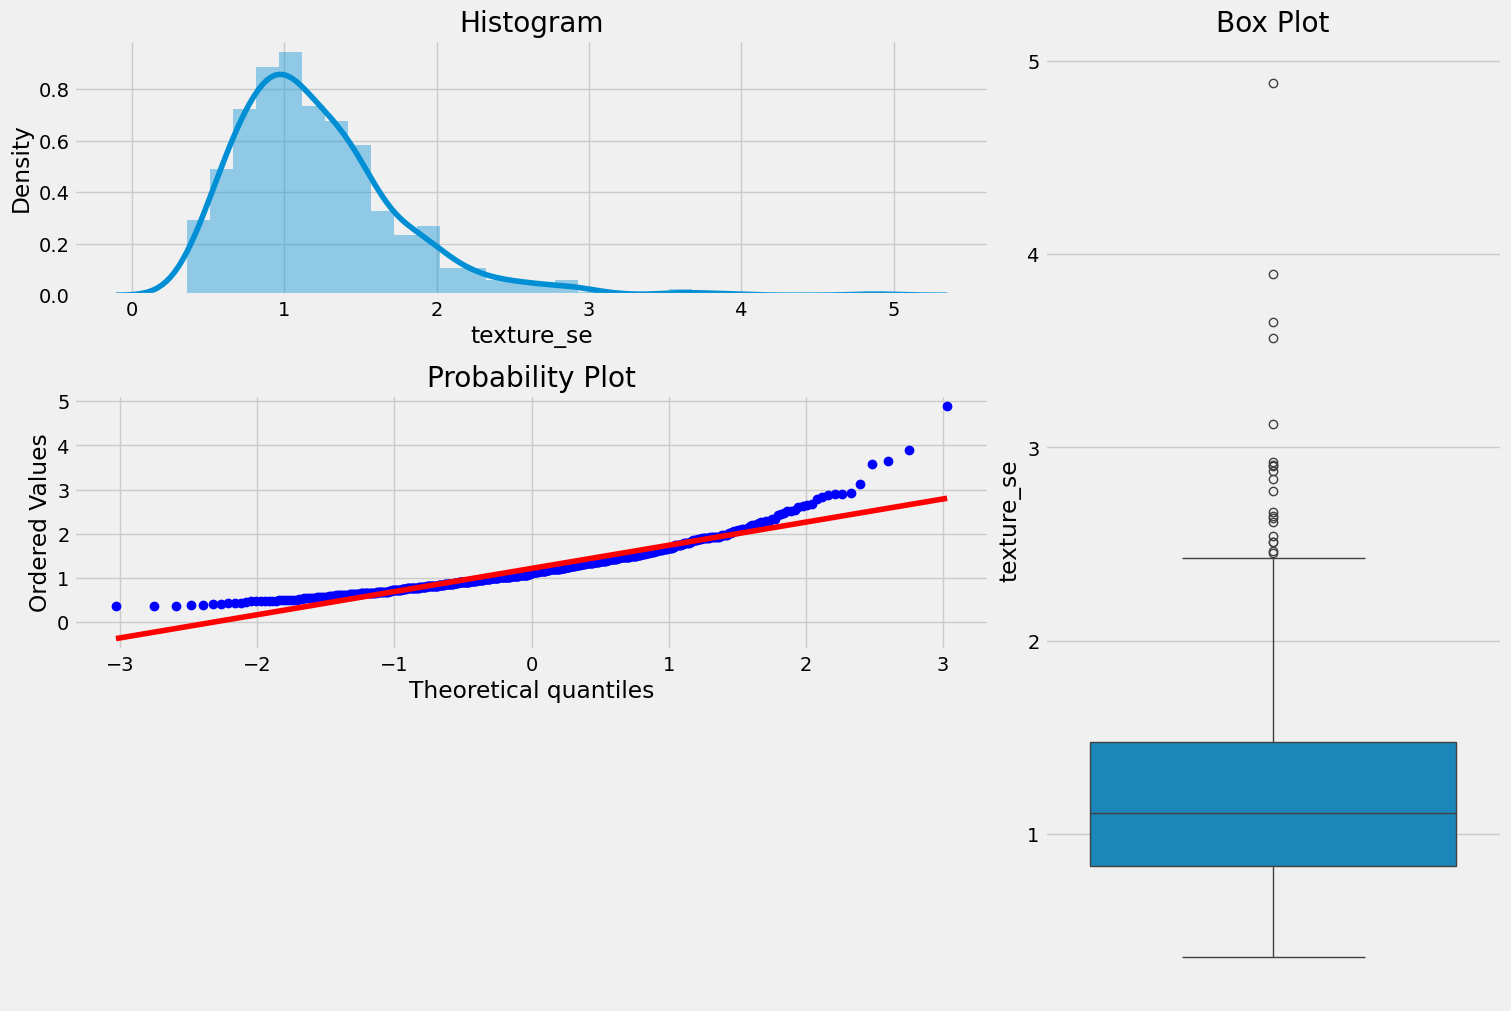

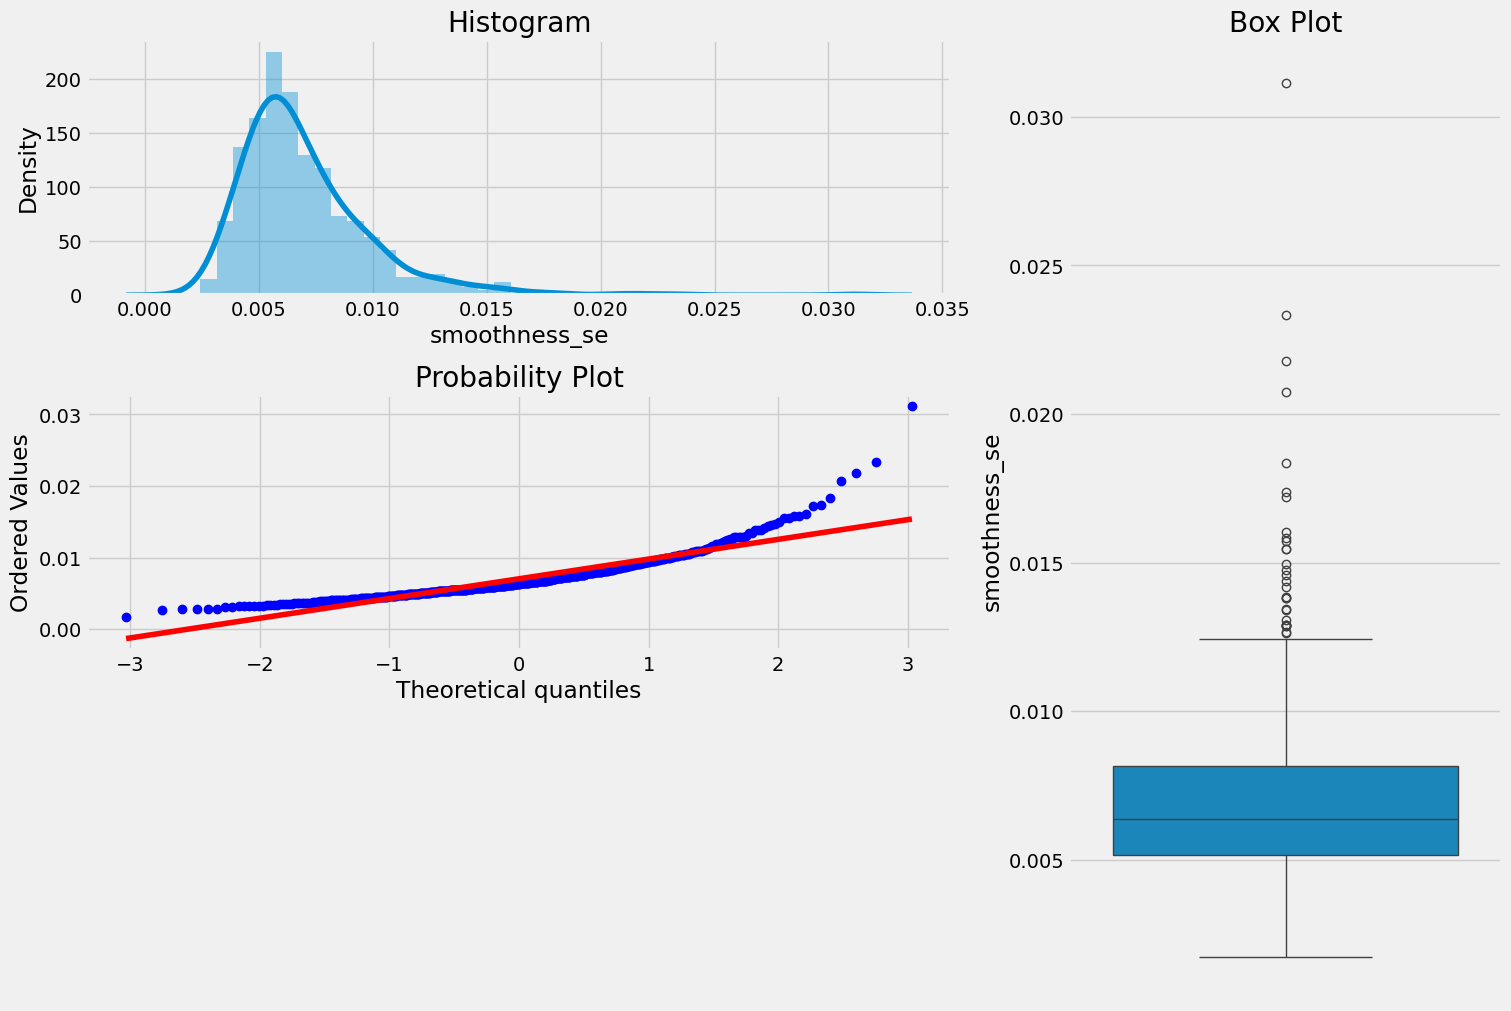

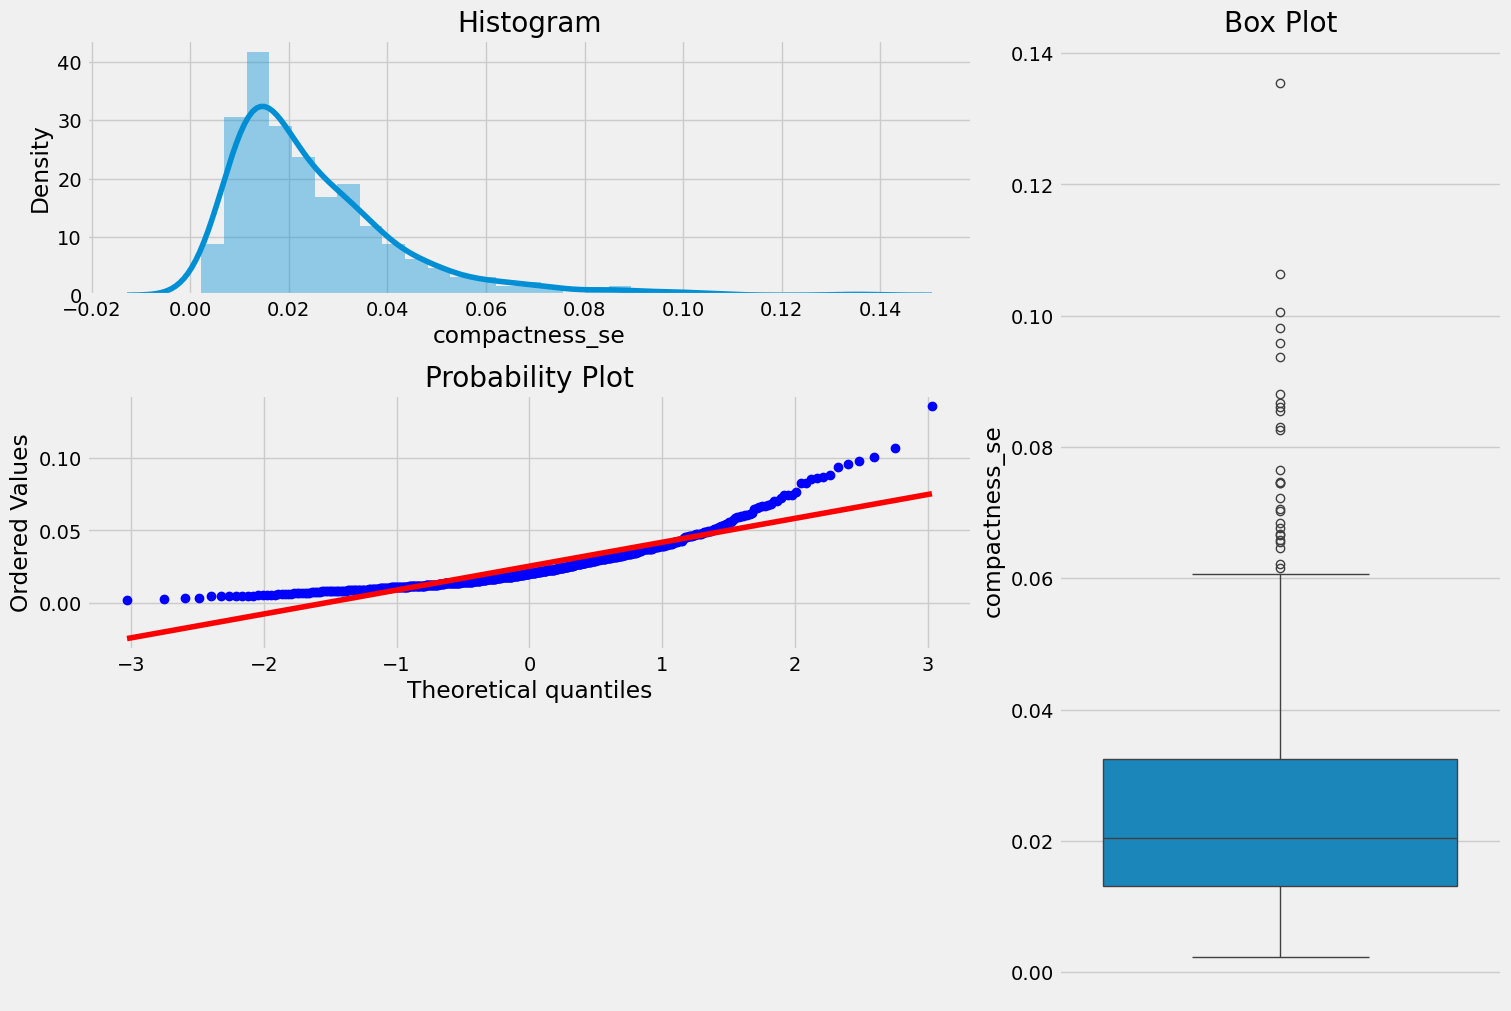

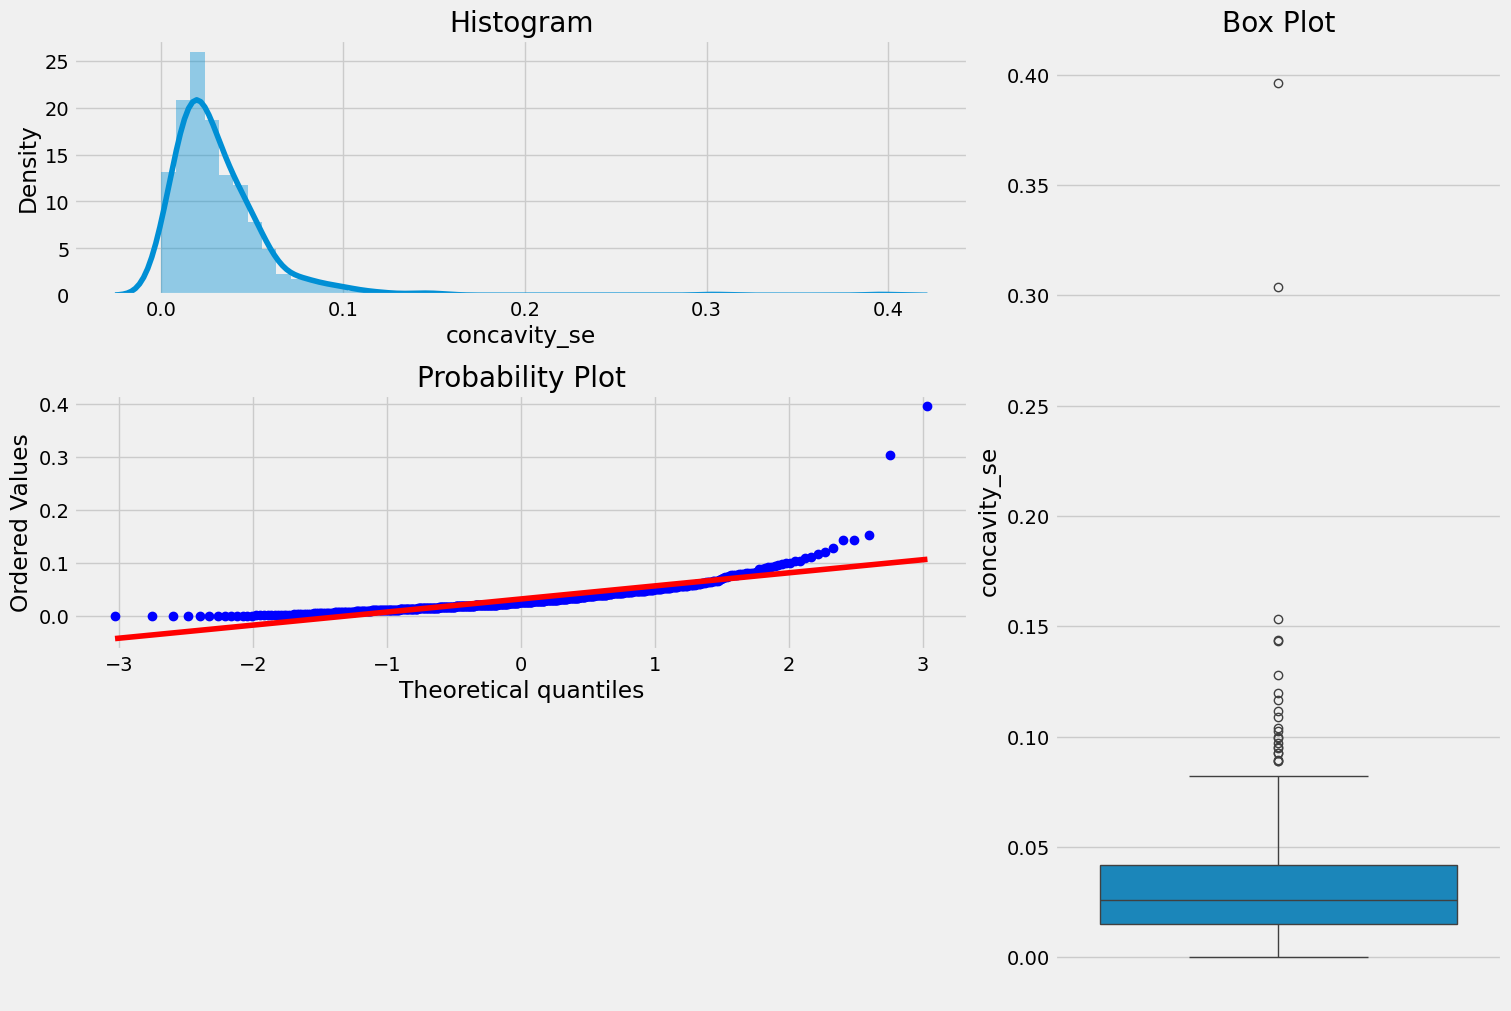

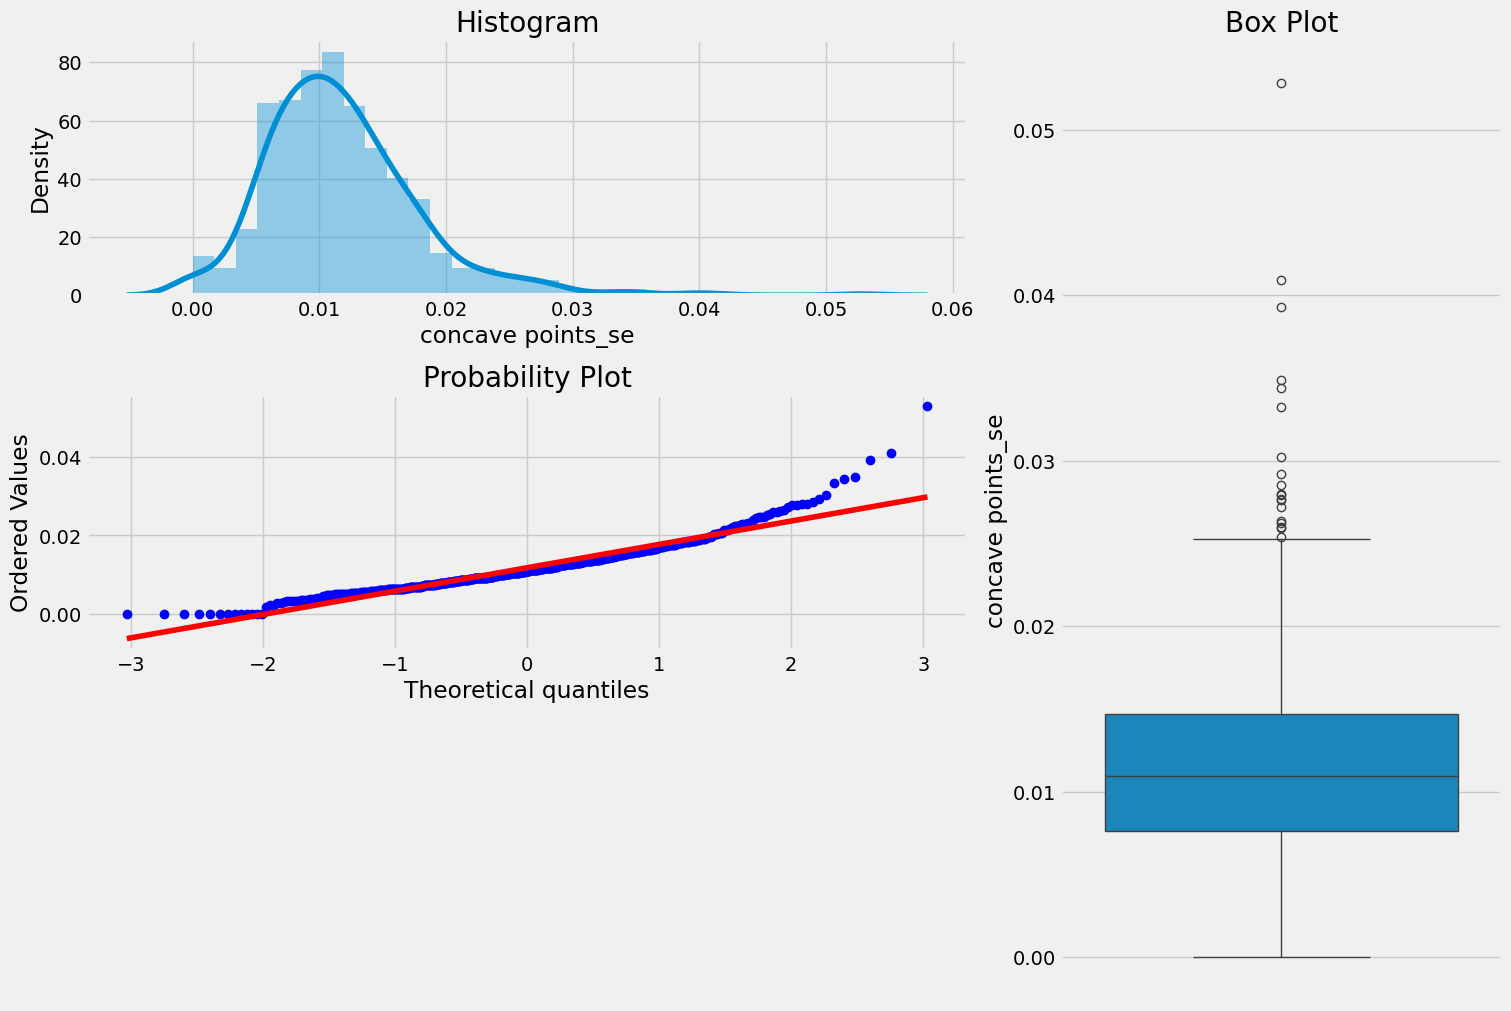

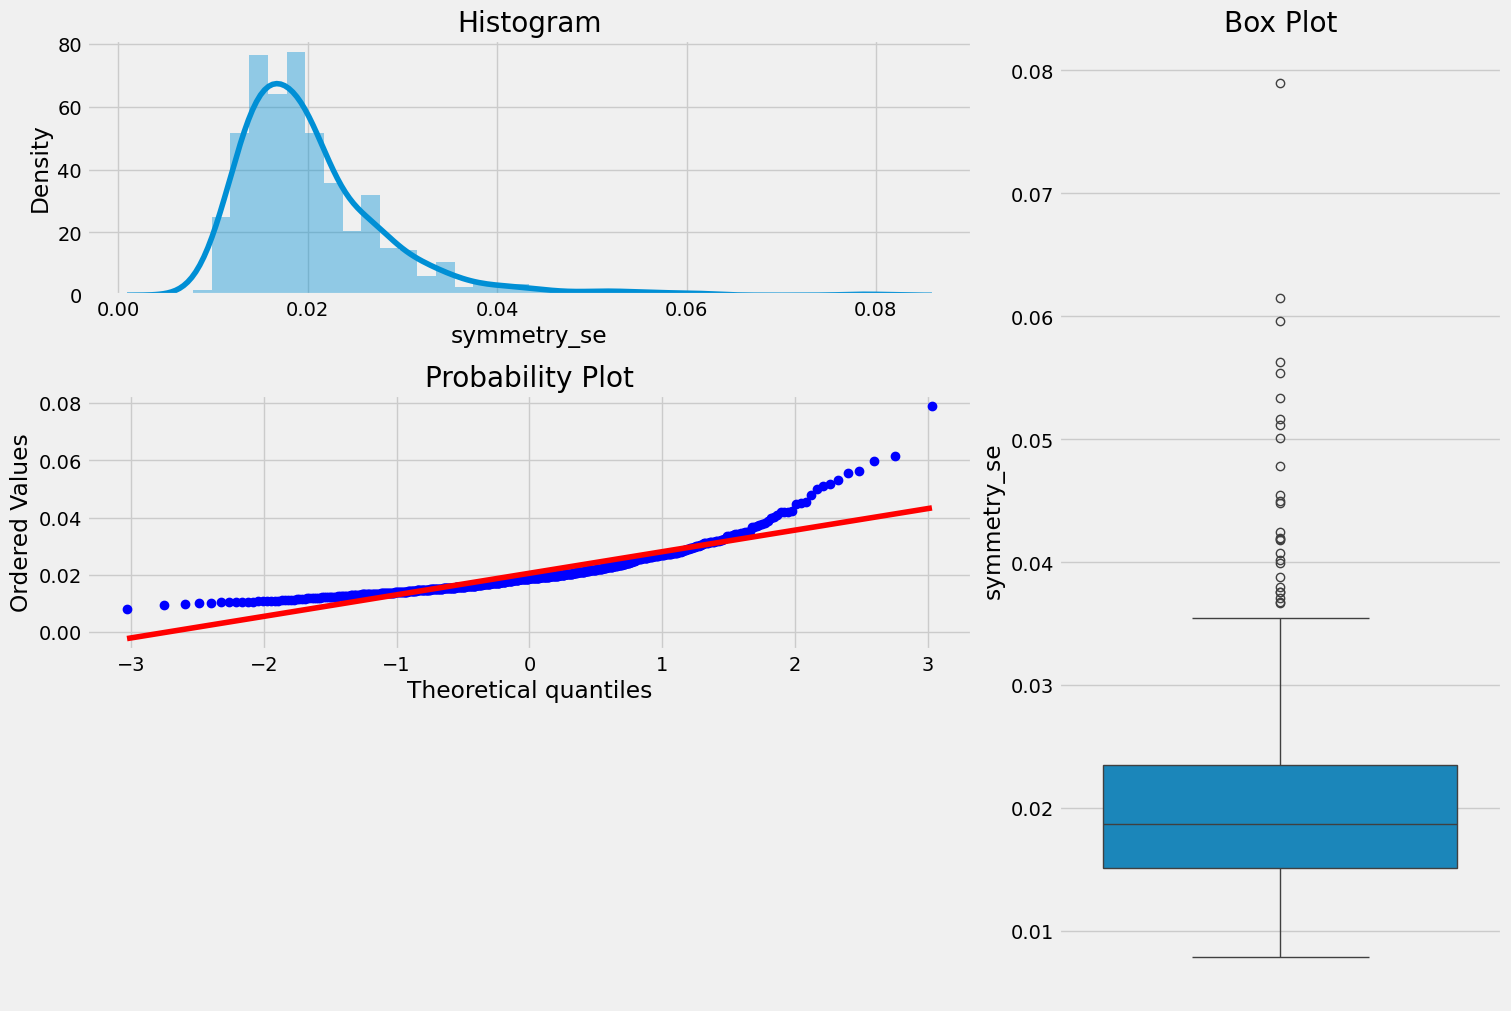

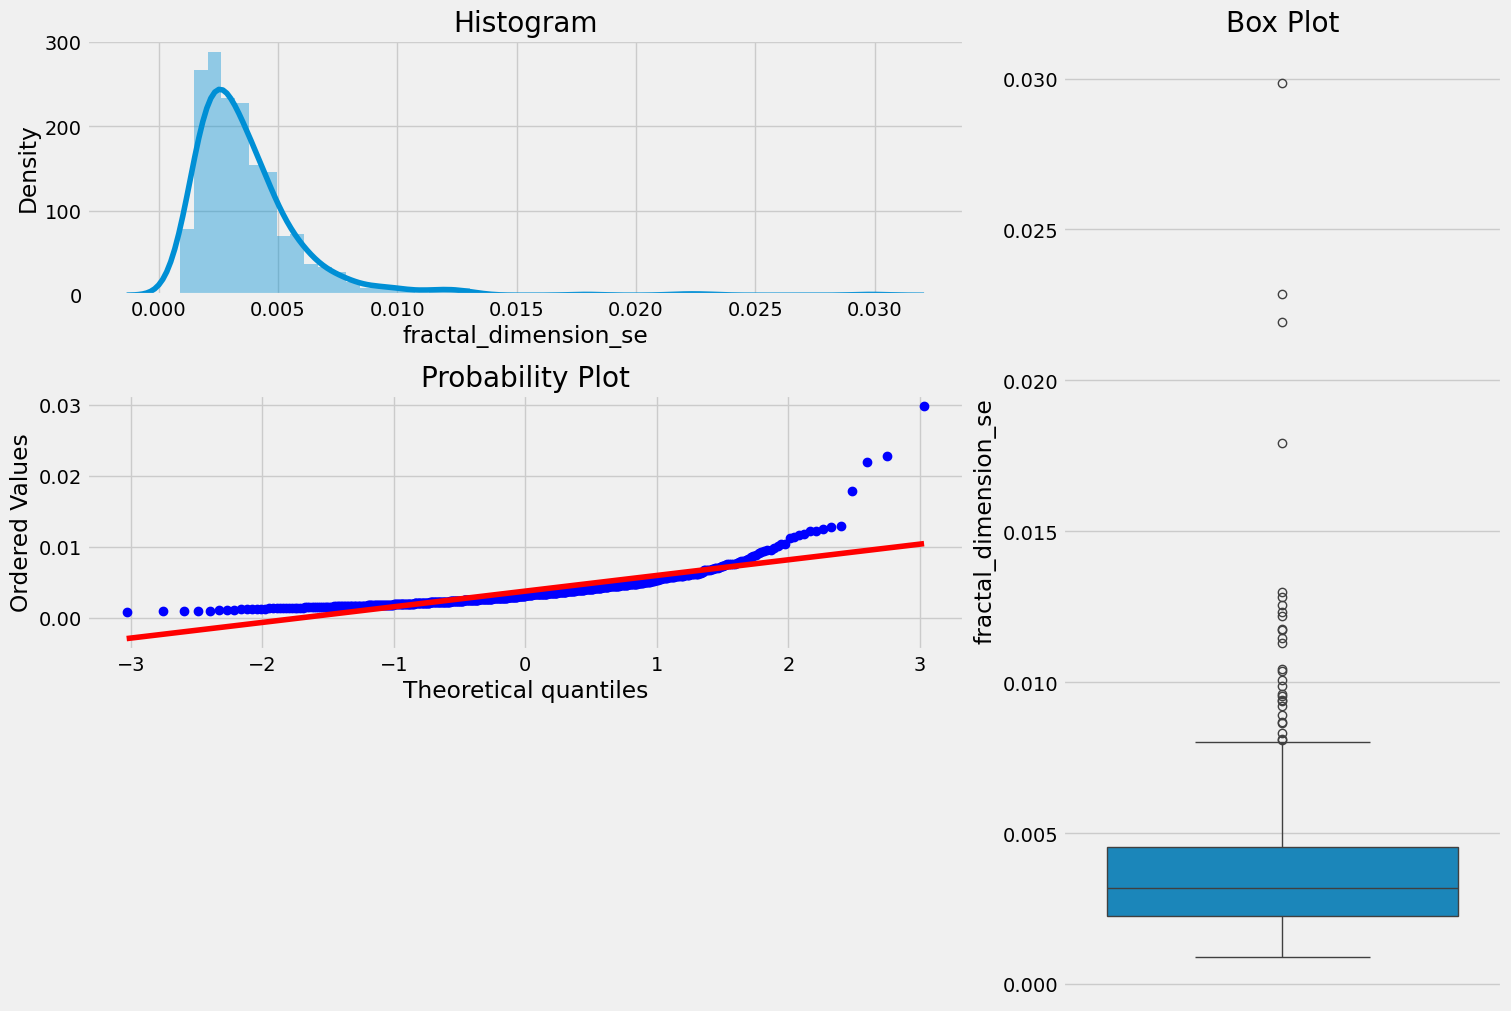

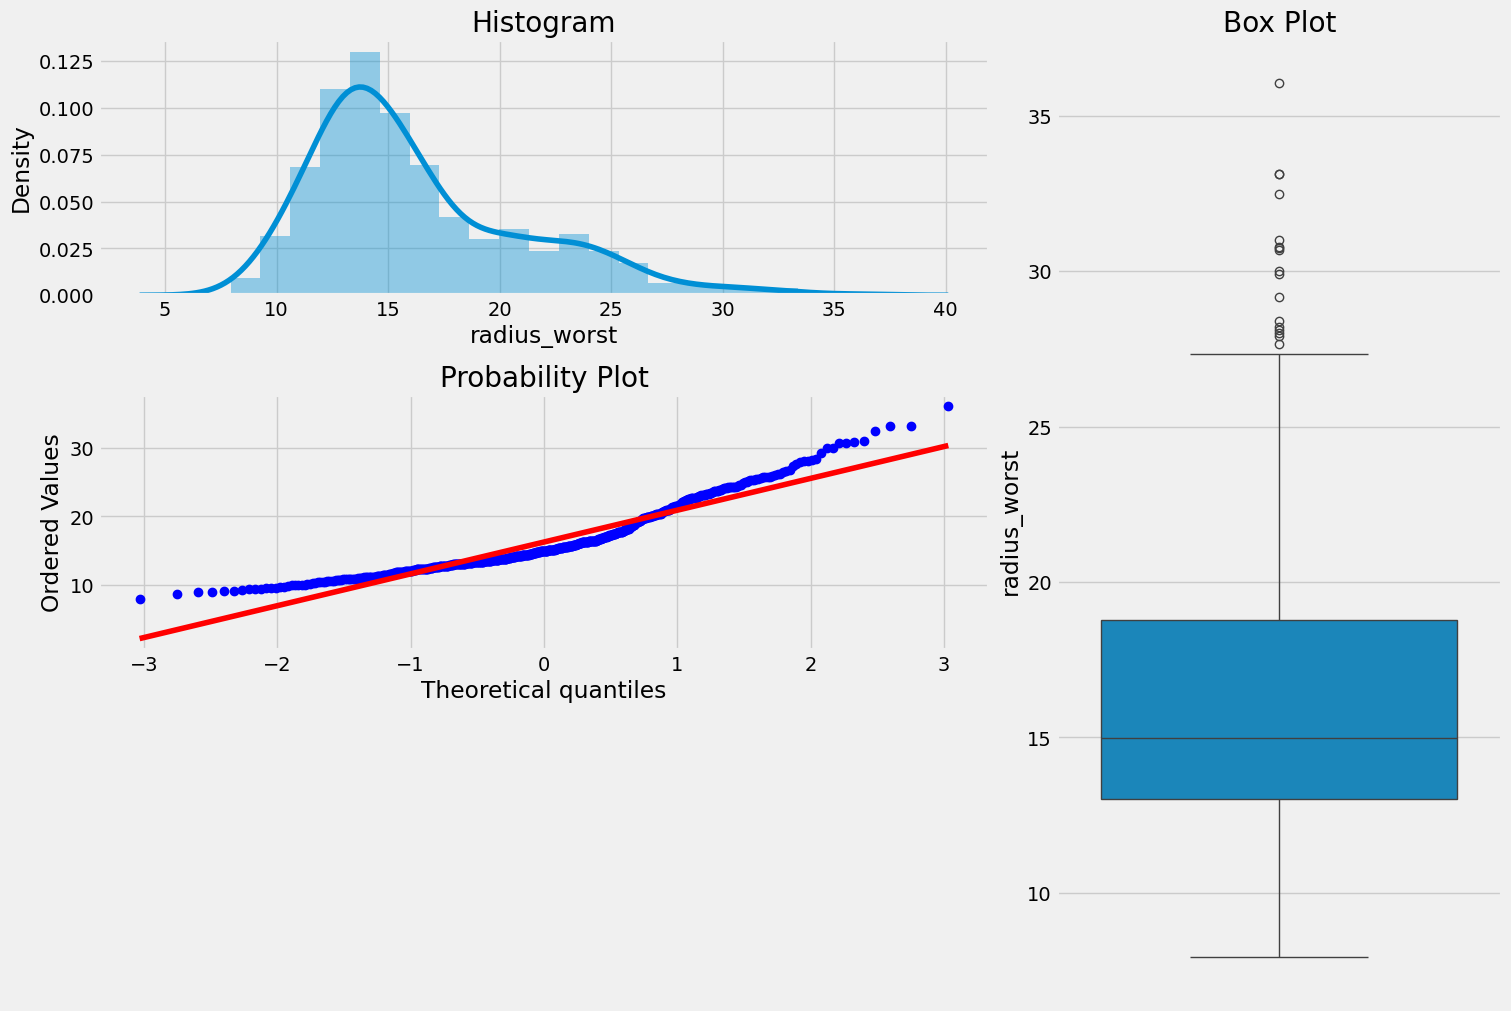

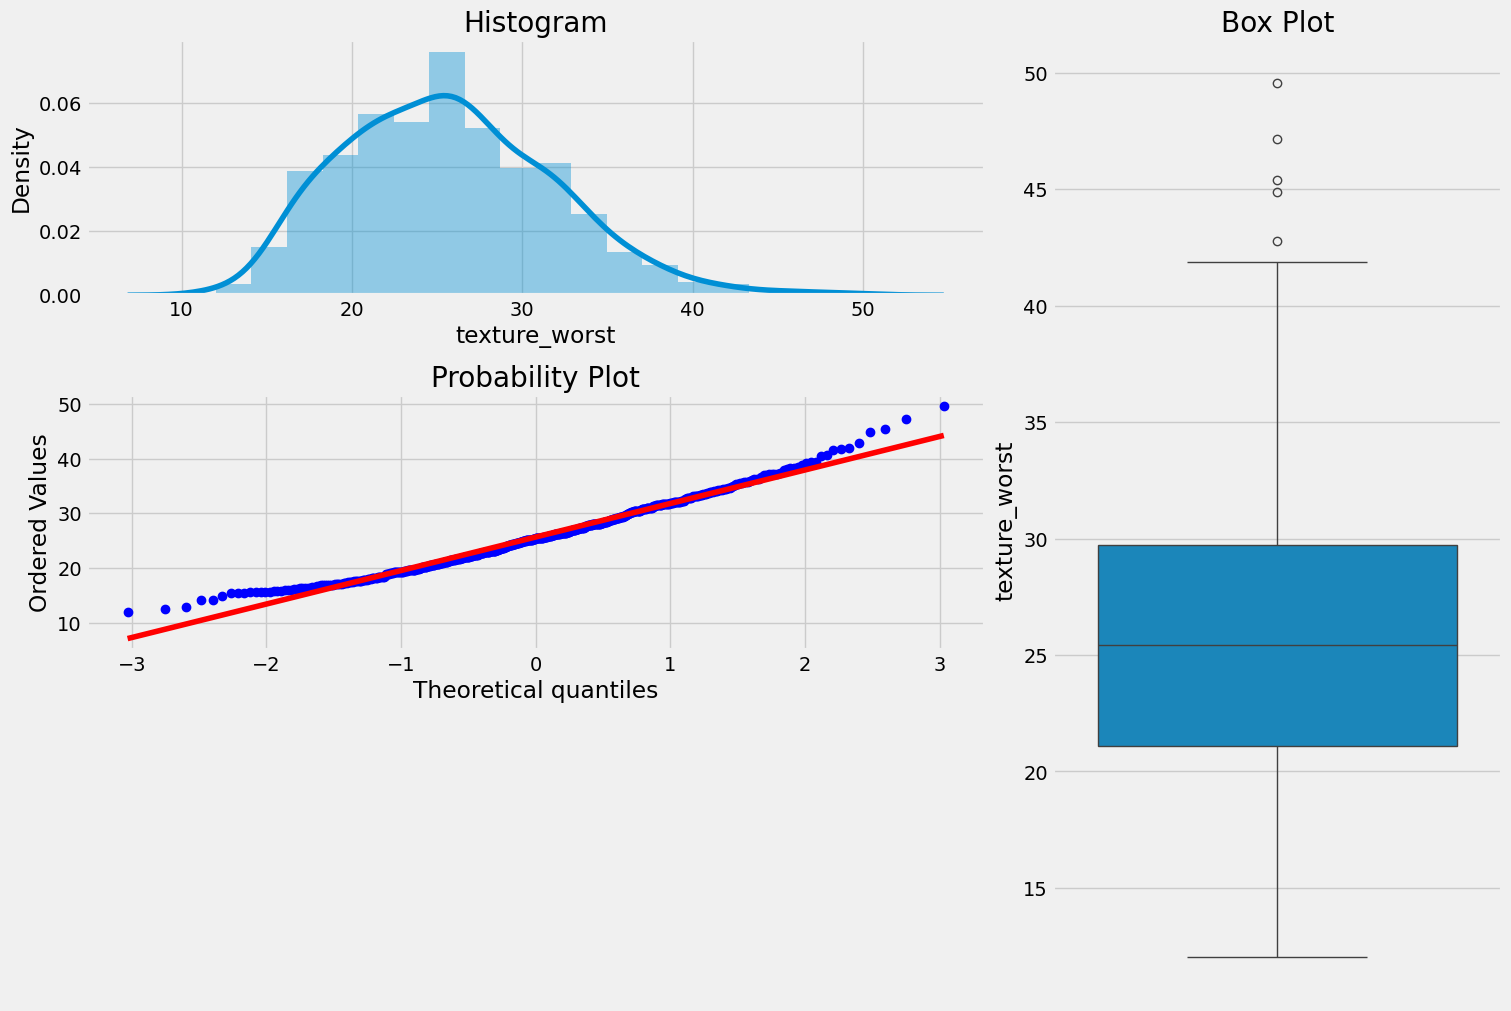

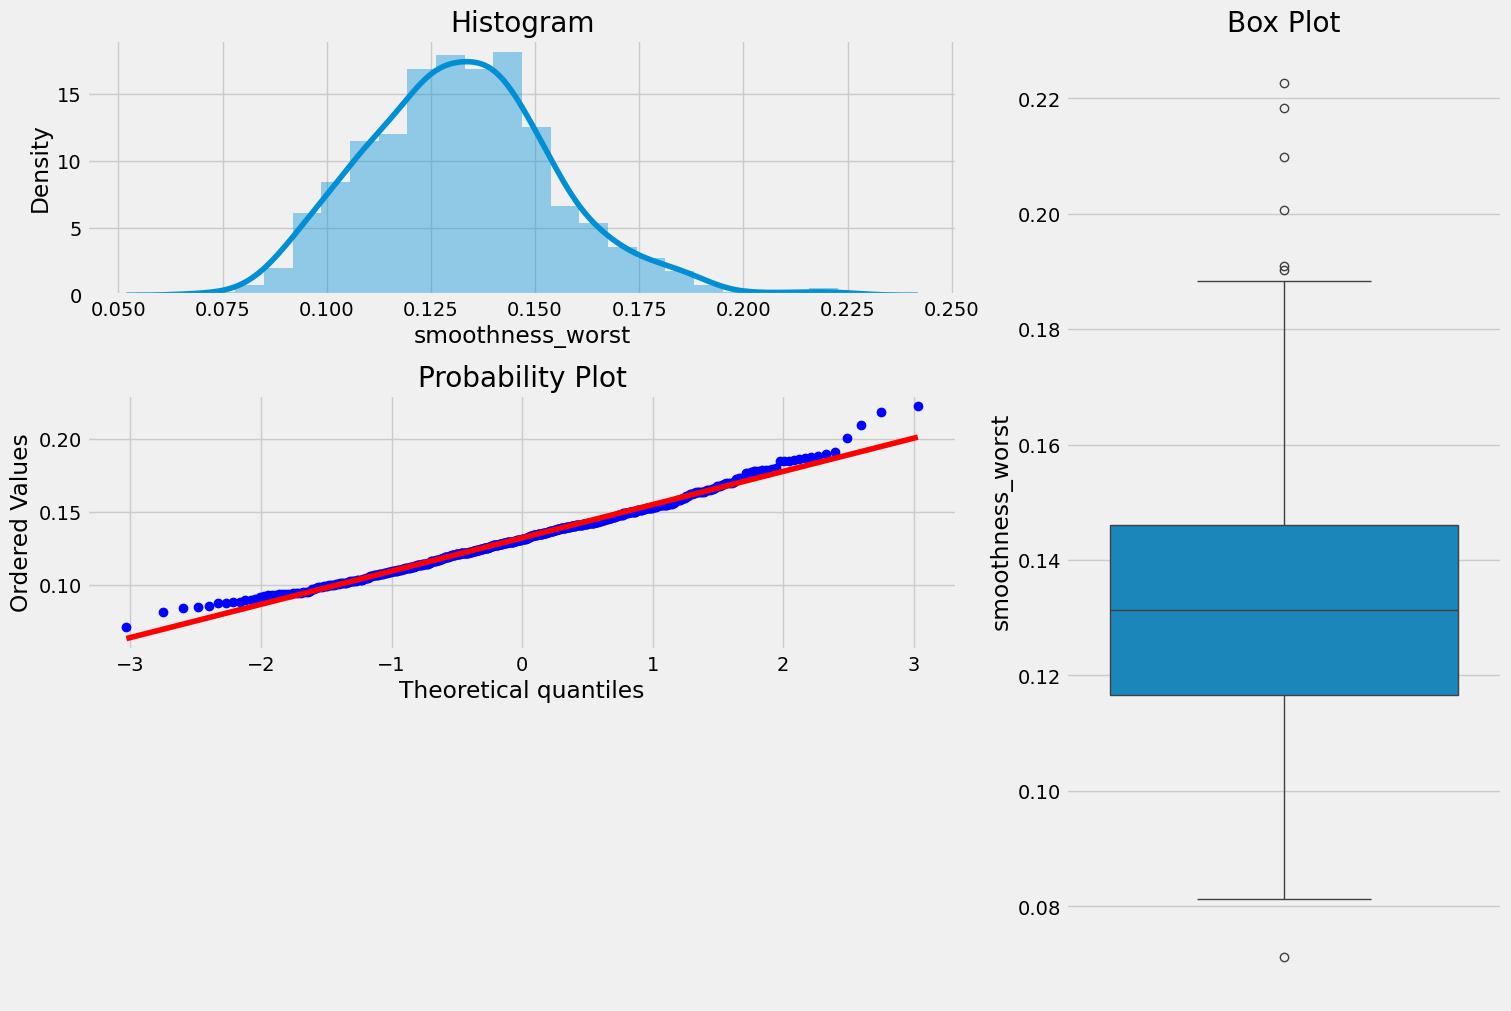

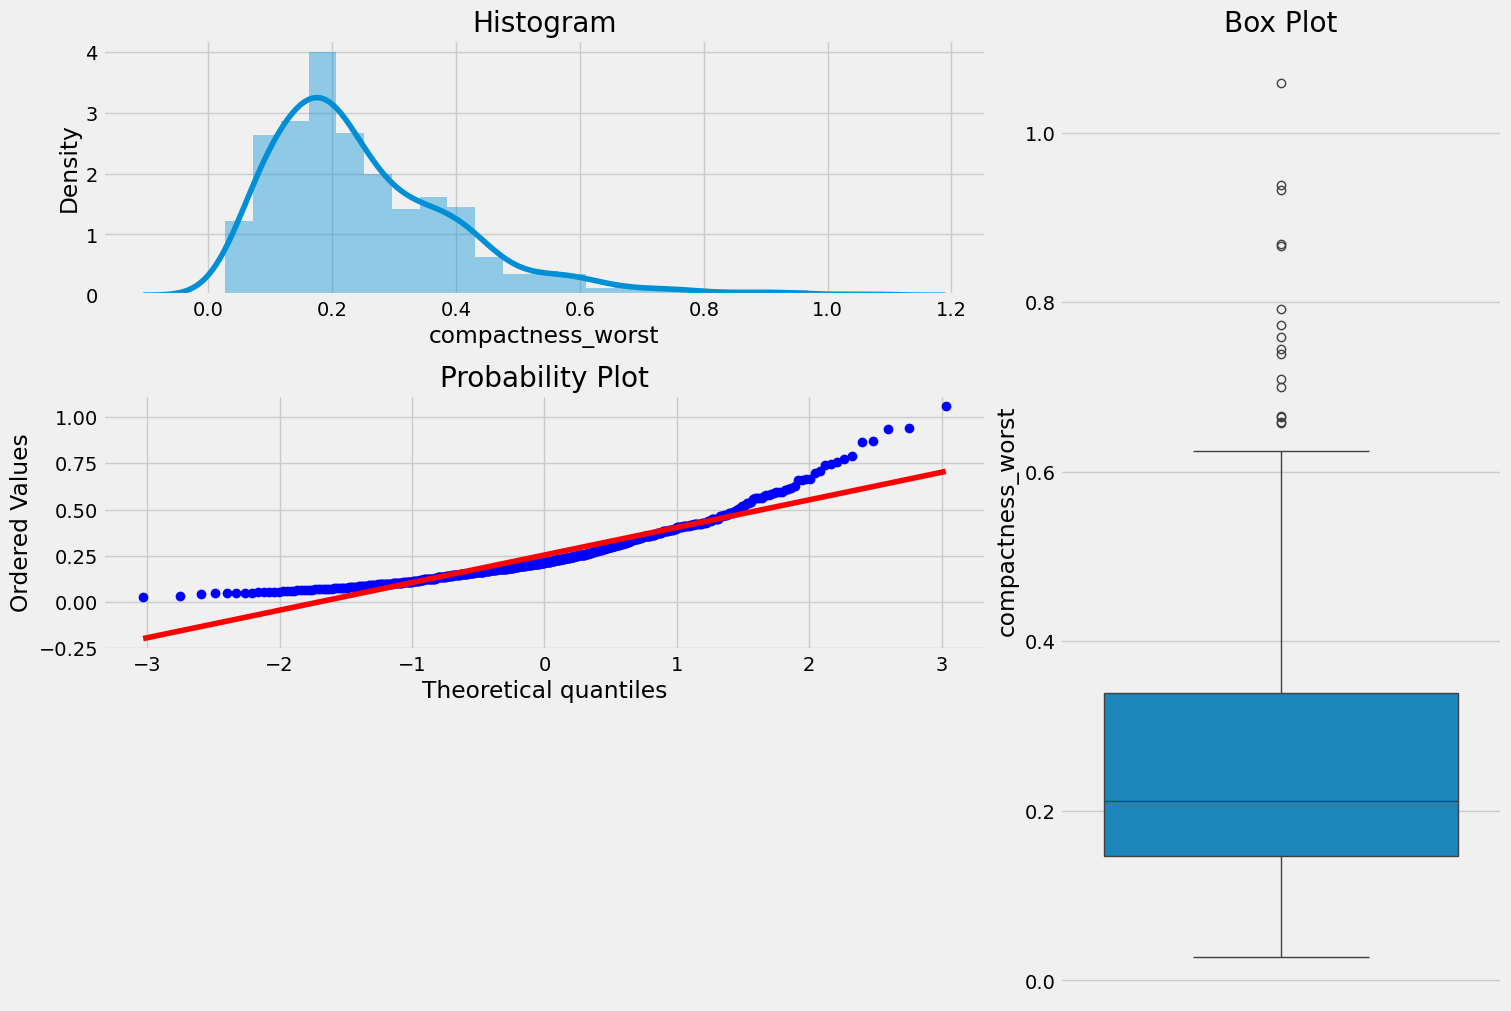

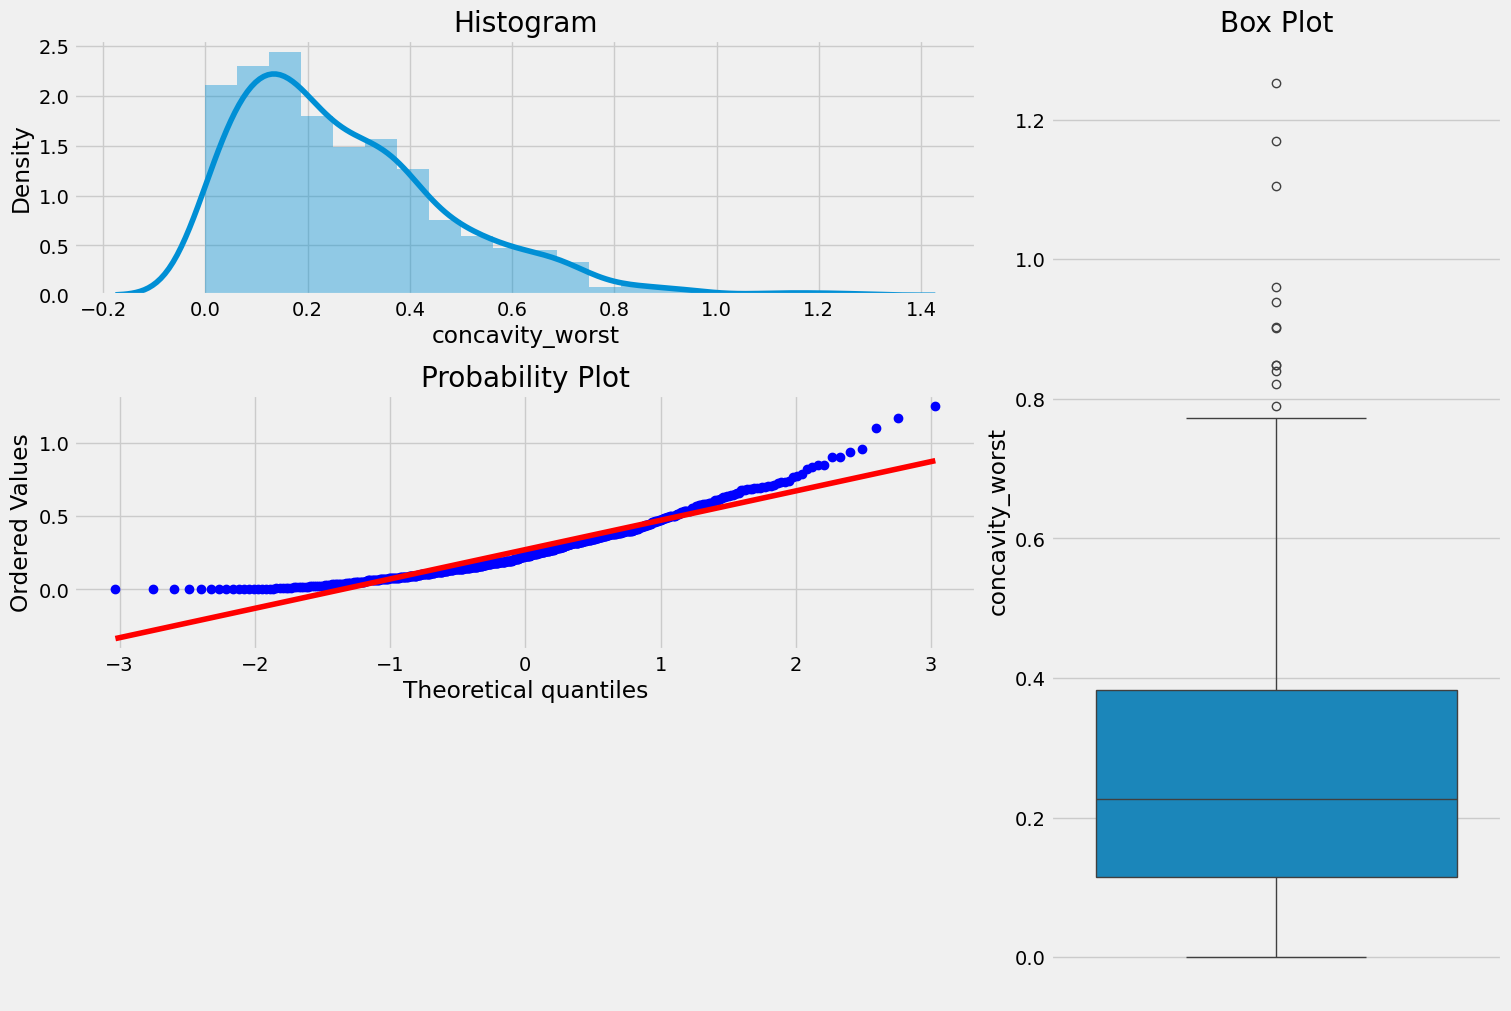

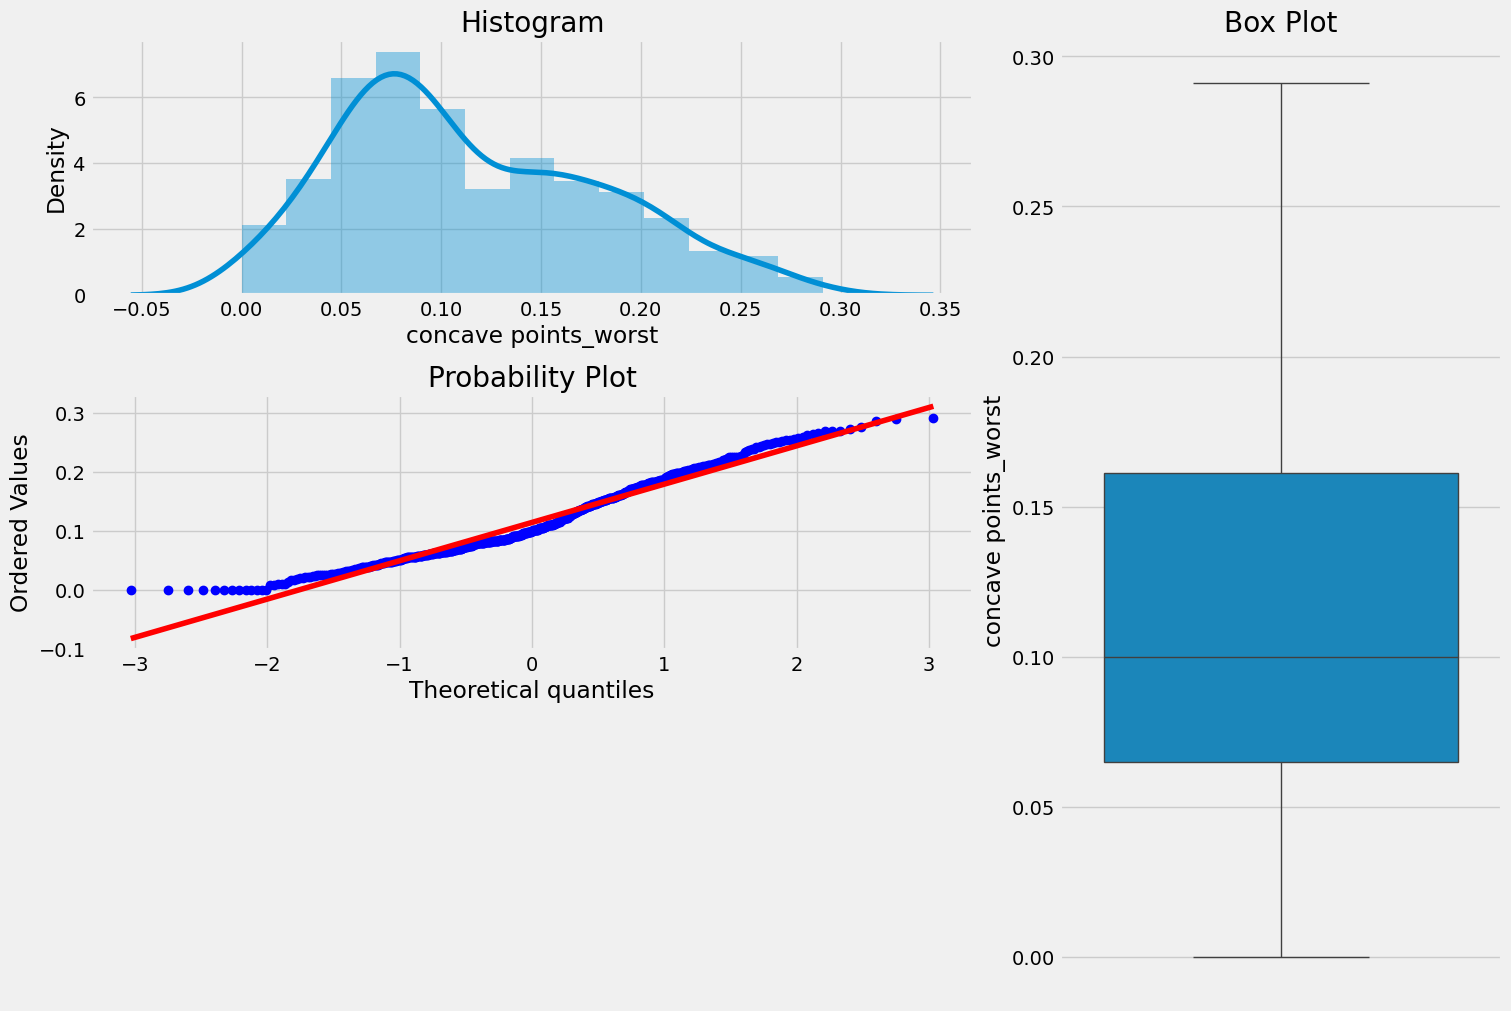

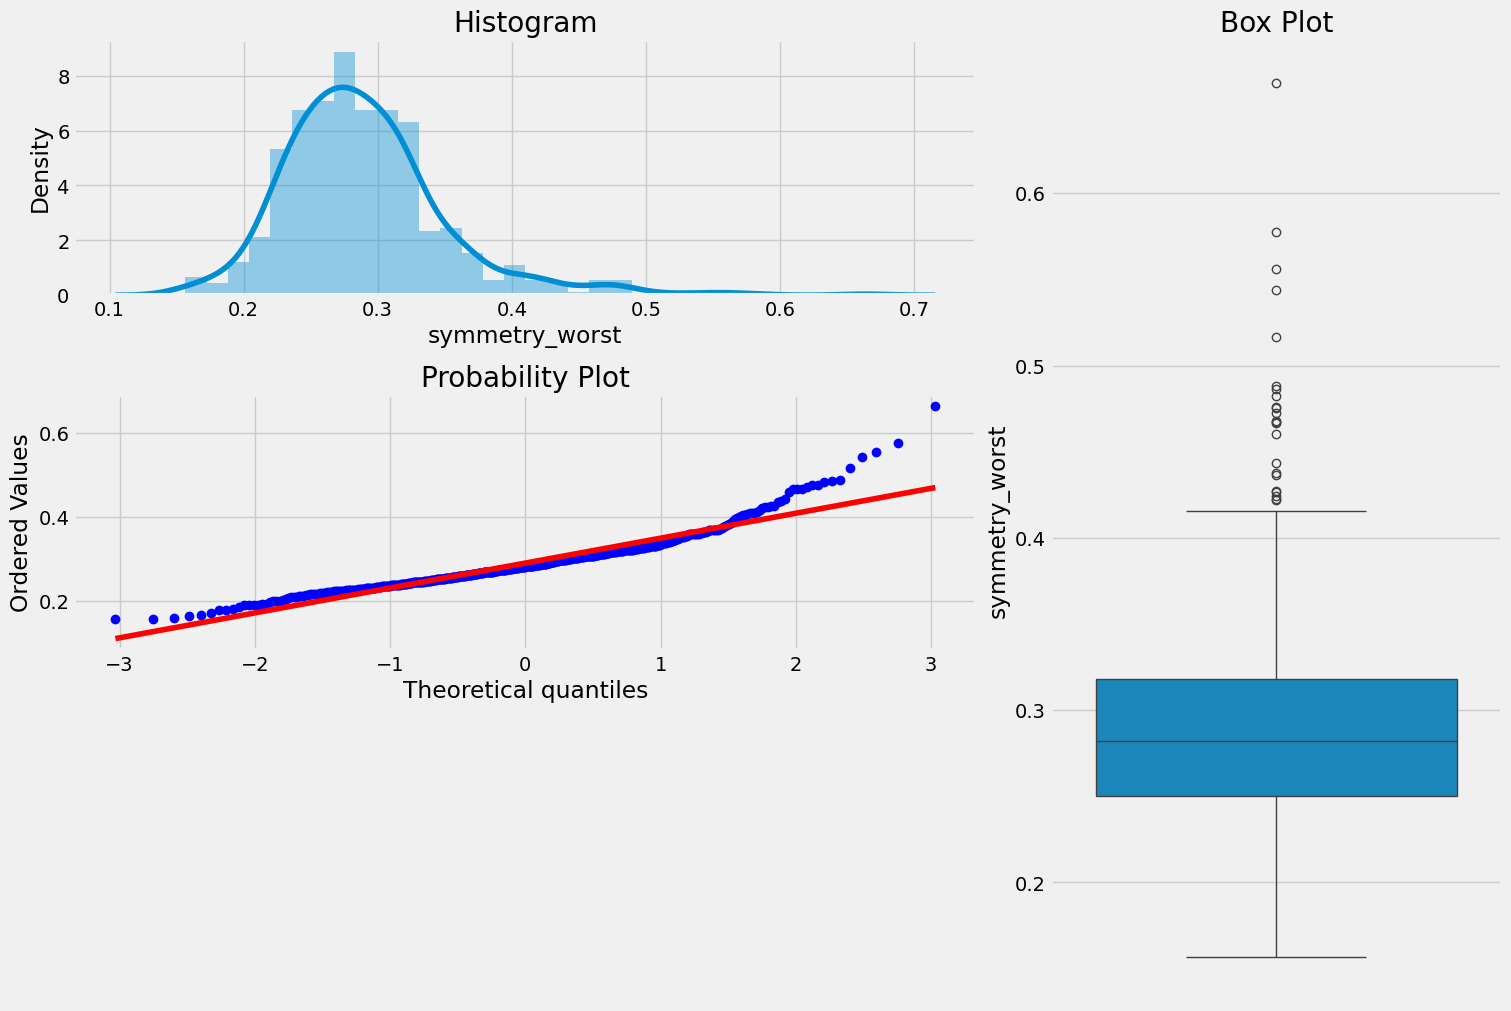

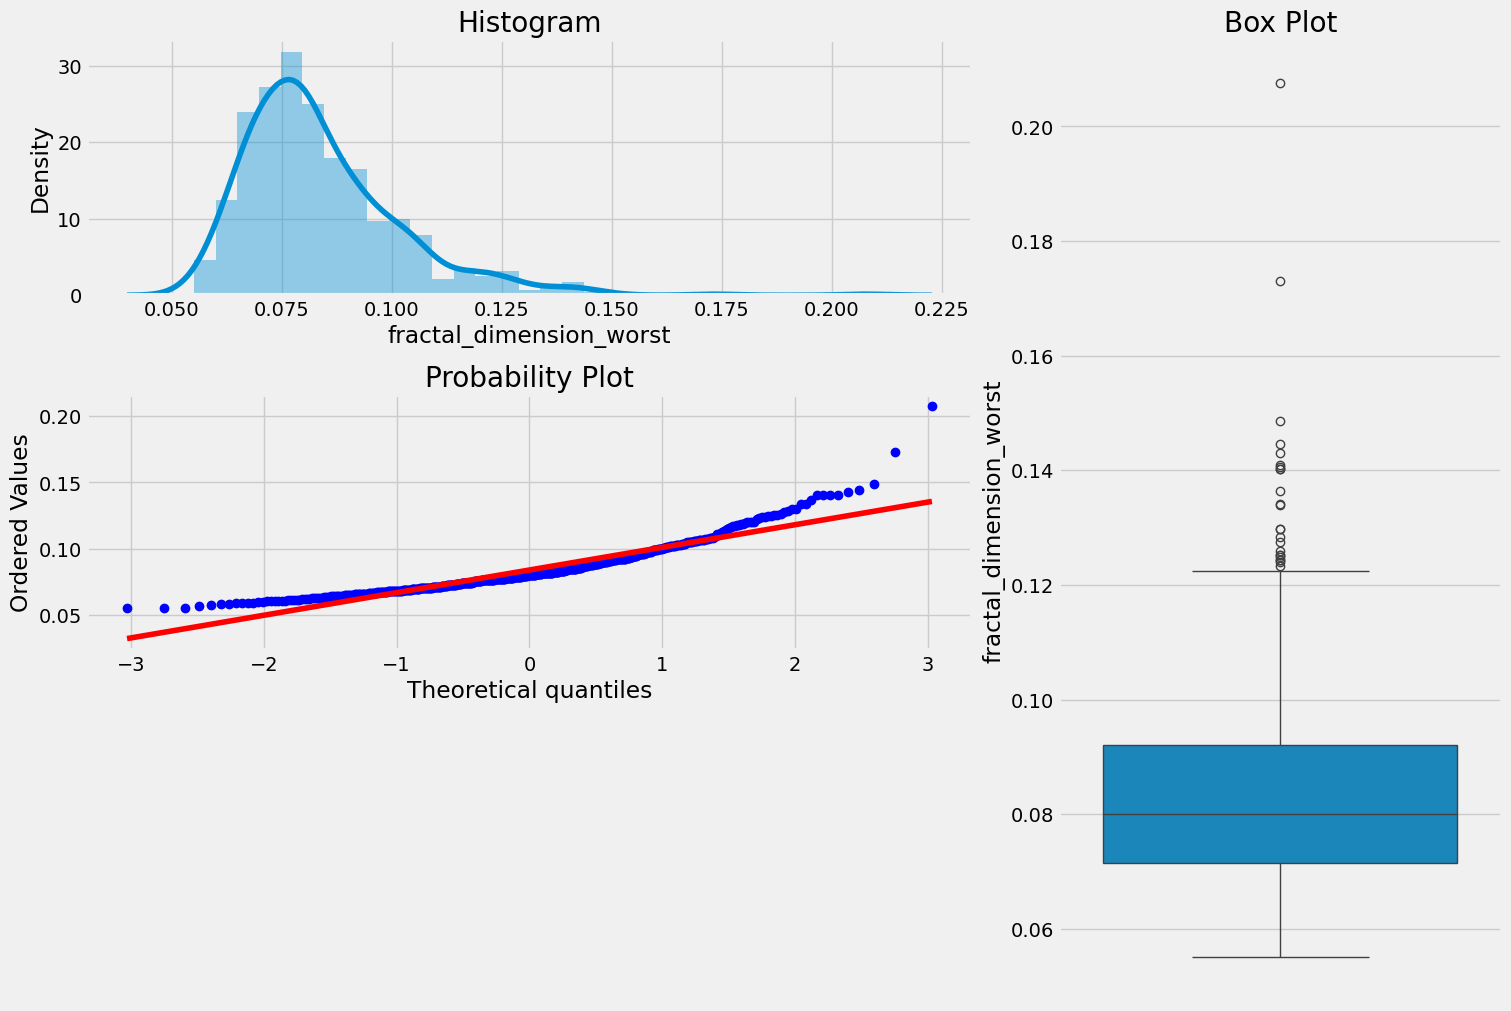

In [70]:
for i in df.columns[0:len(df.columns)]:
    plotting_3_chart(df,i)

Il y a 24 colonnes dans le dataset


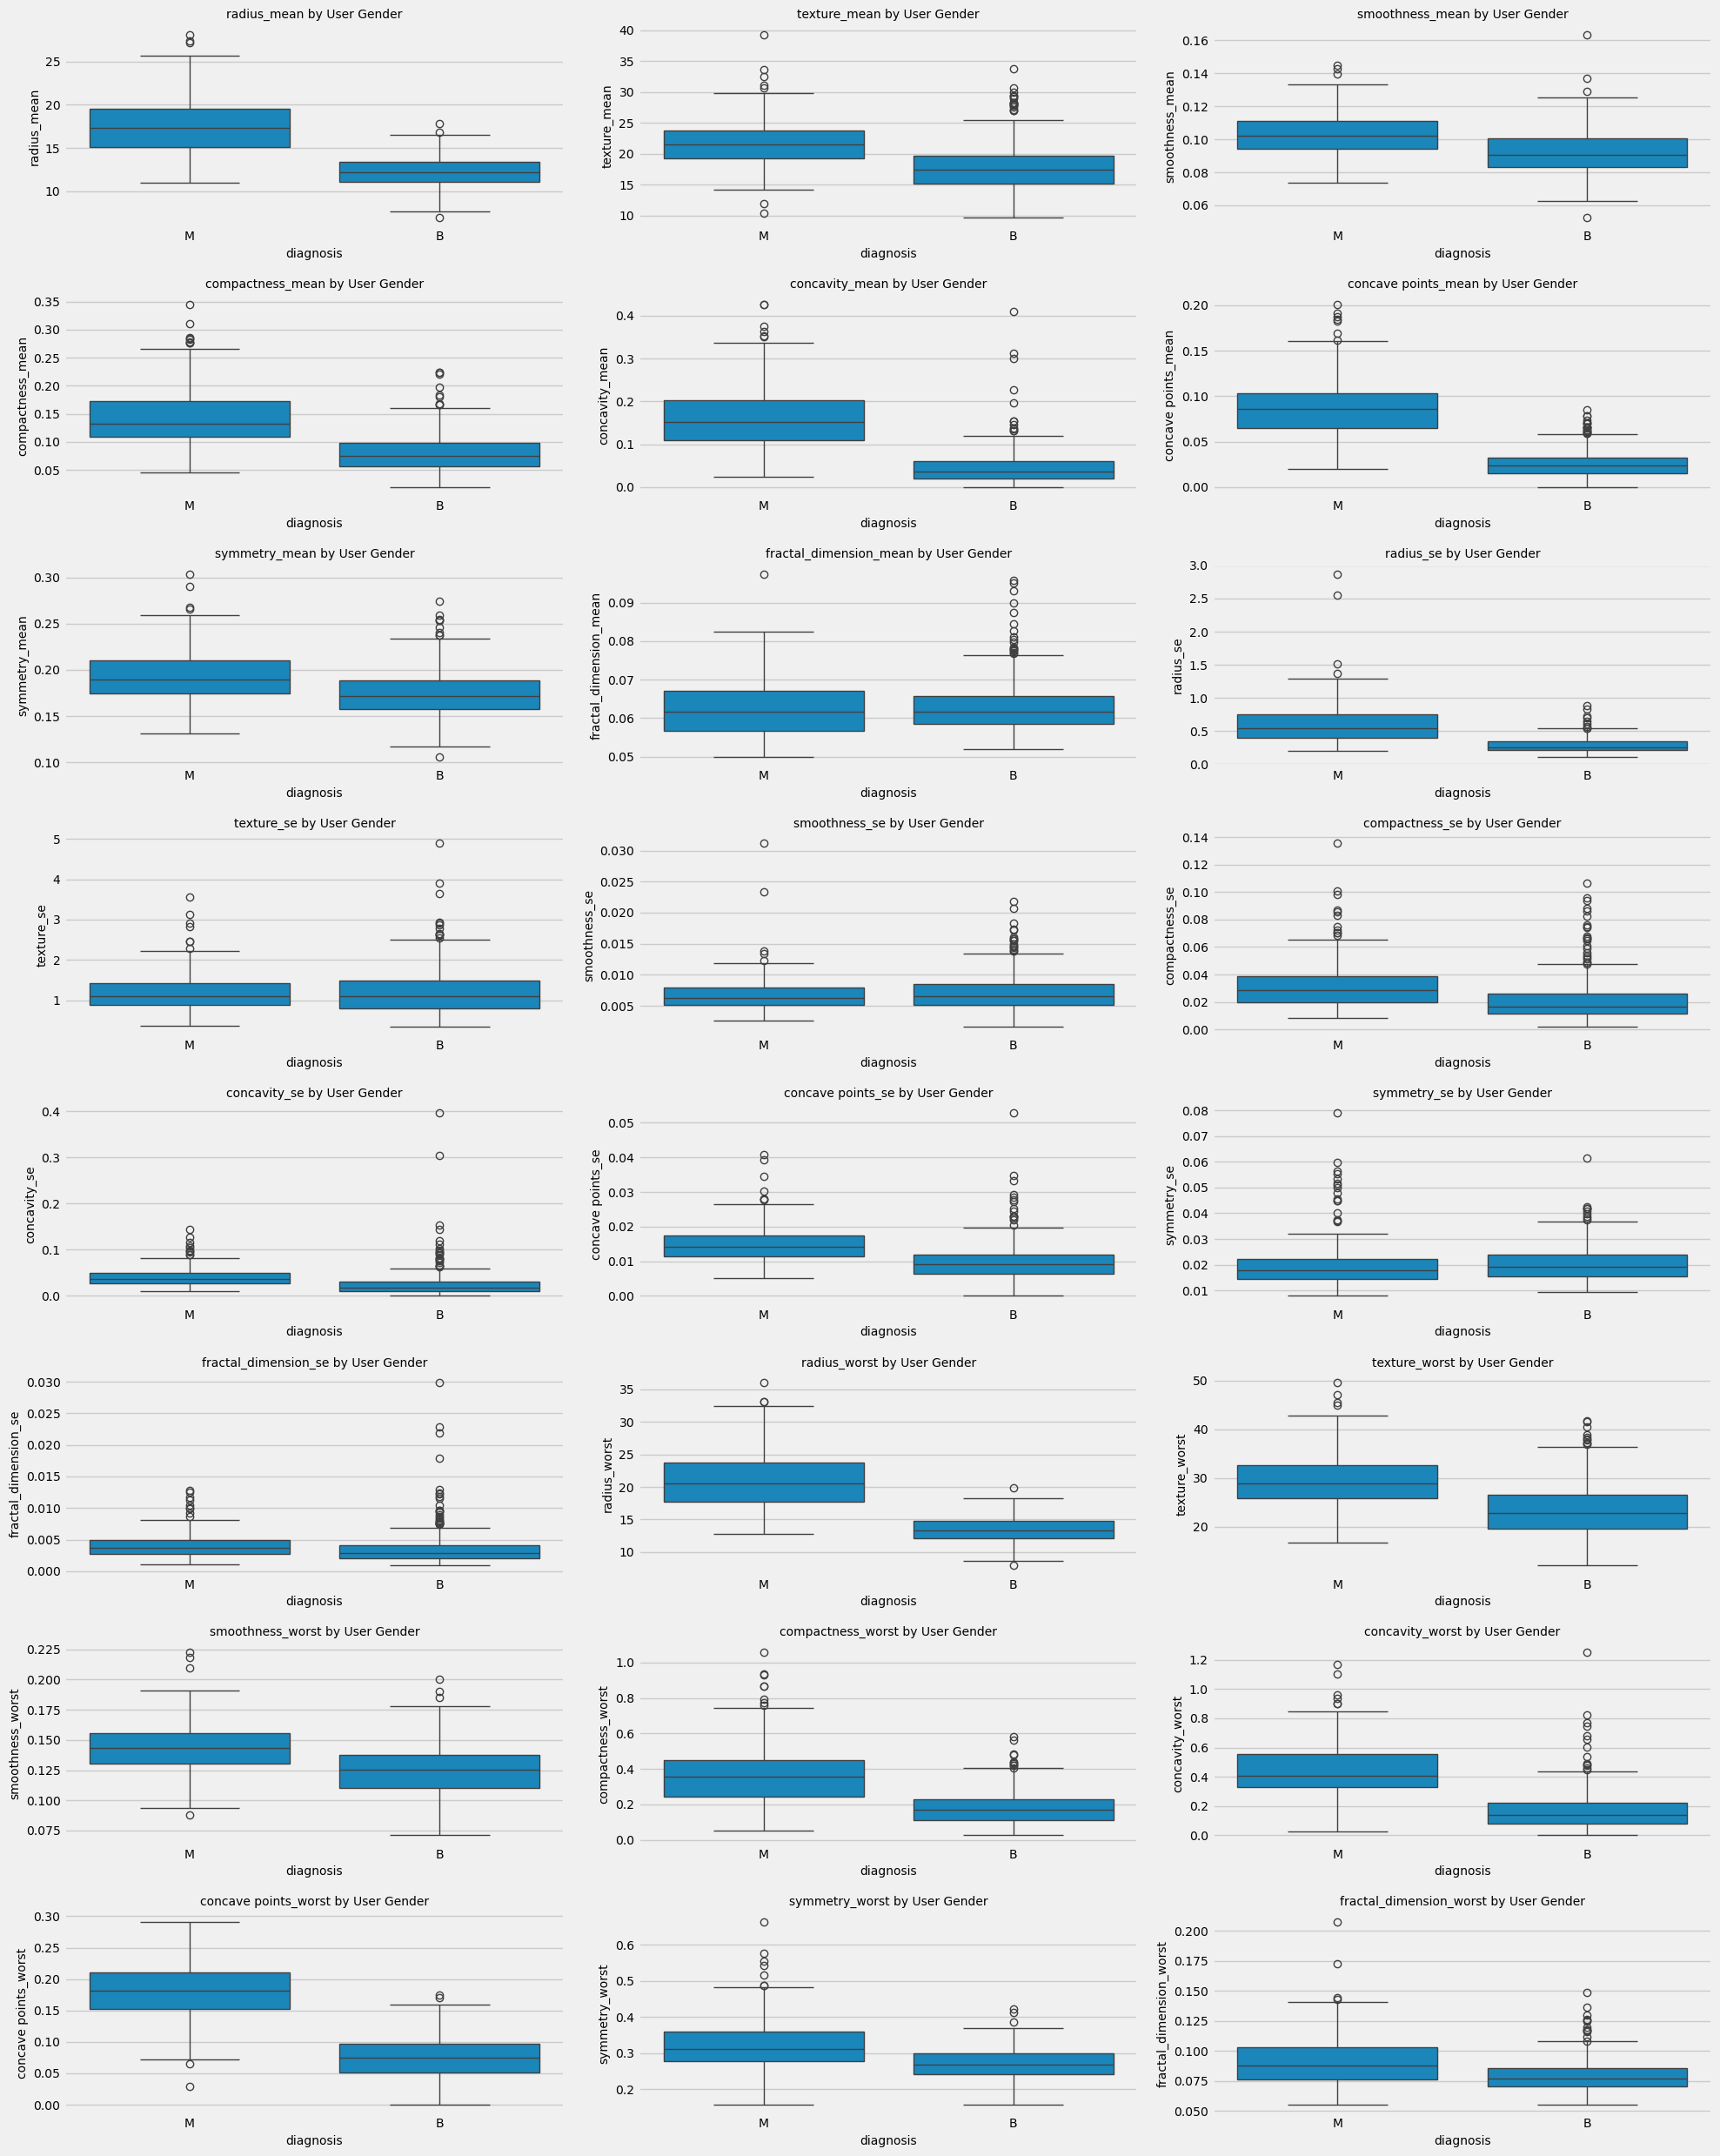

In [71]:
fig, axes = plt.subplots(8, 3, figsize=(20, 25))
print(f'Il y a {len(df.columns)} colonnes dans le dataset')
for i, column in enumerate(df.columns[0:len(df.columns)]):
    
    row = i // 3
    col = i % 3
    diag = y
    sns.boxplot(x=diag, y=column, data=df, ax=axes[row, col])
    axes[row, col].set_title(f'{column} by User Gender', fontsize=10)
    axes[row, col].set_xlabel('diagnosis', fontsize=10)
    axes[row, col].set_ylabel(column, fontsize=10)
    axes[row, col].tick_params(labelsize=10)

plt.tight_layout()
plt.show()

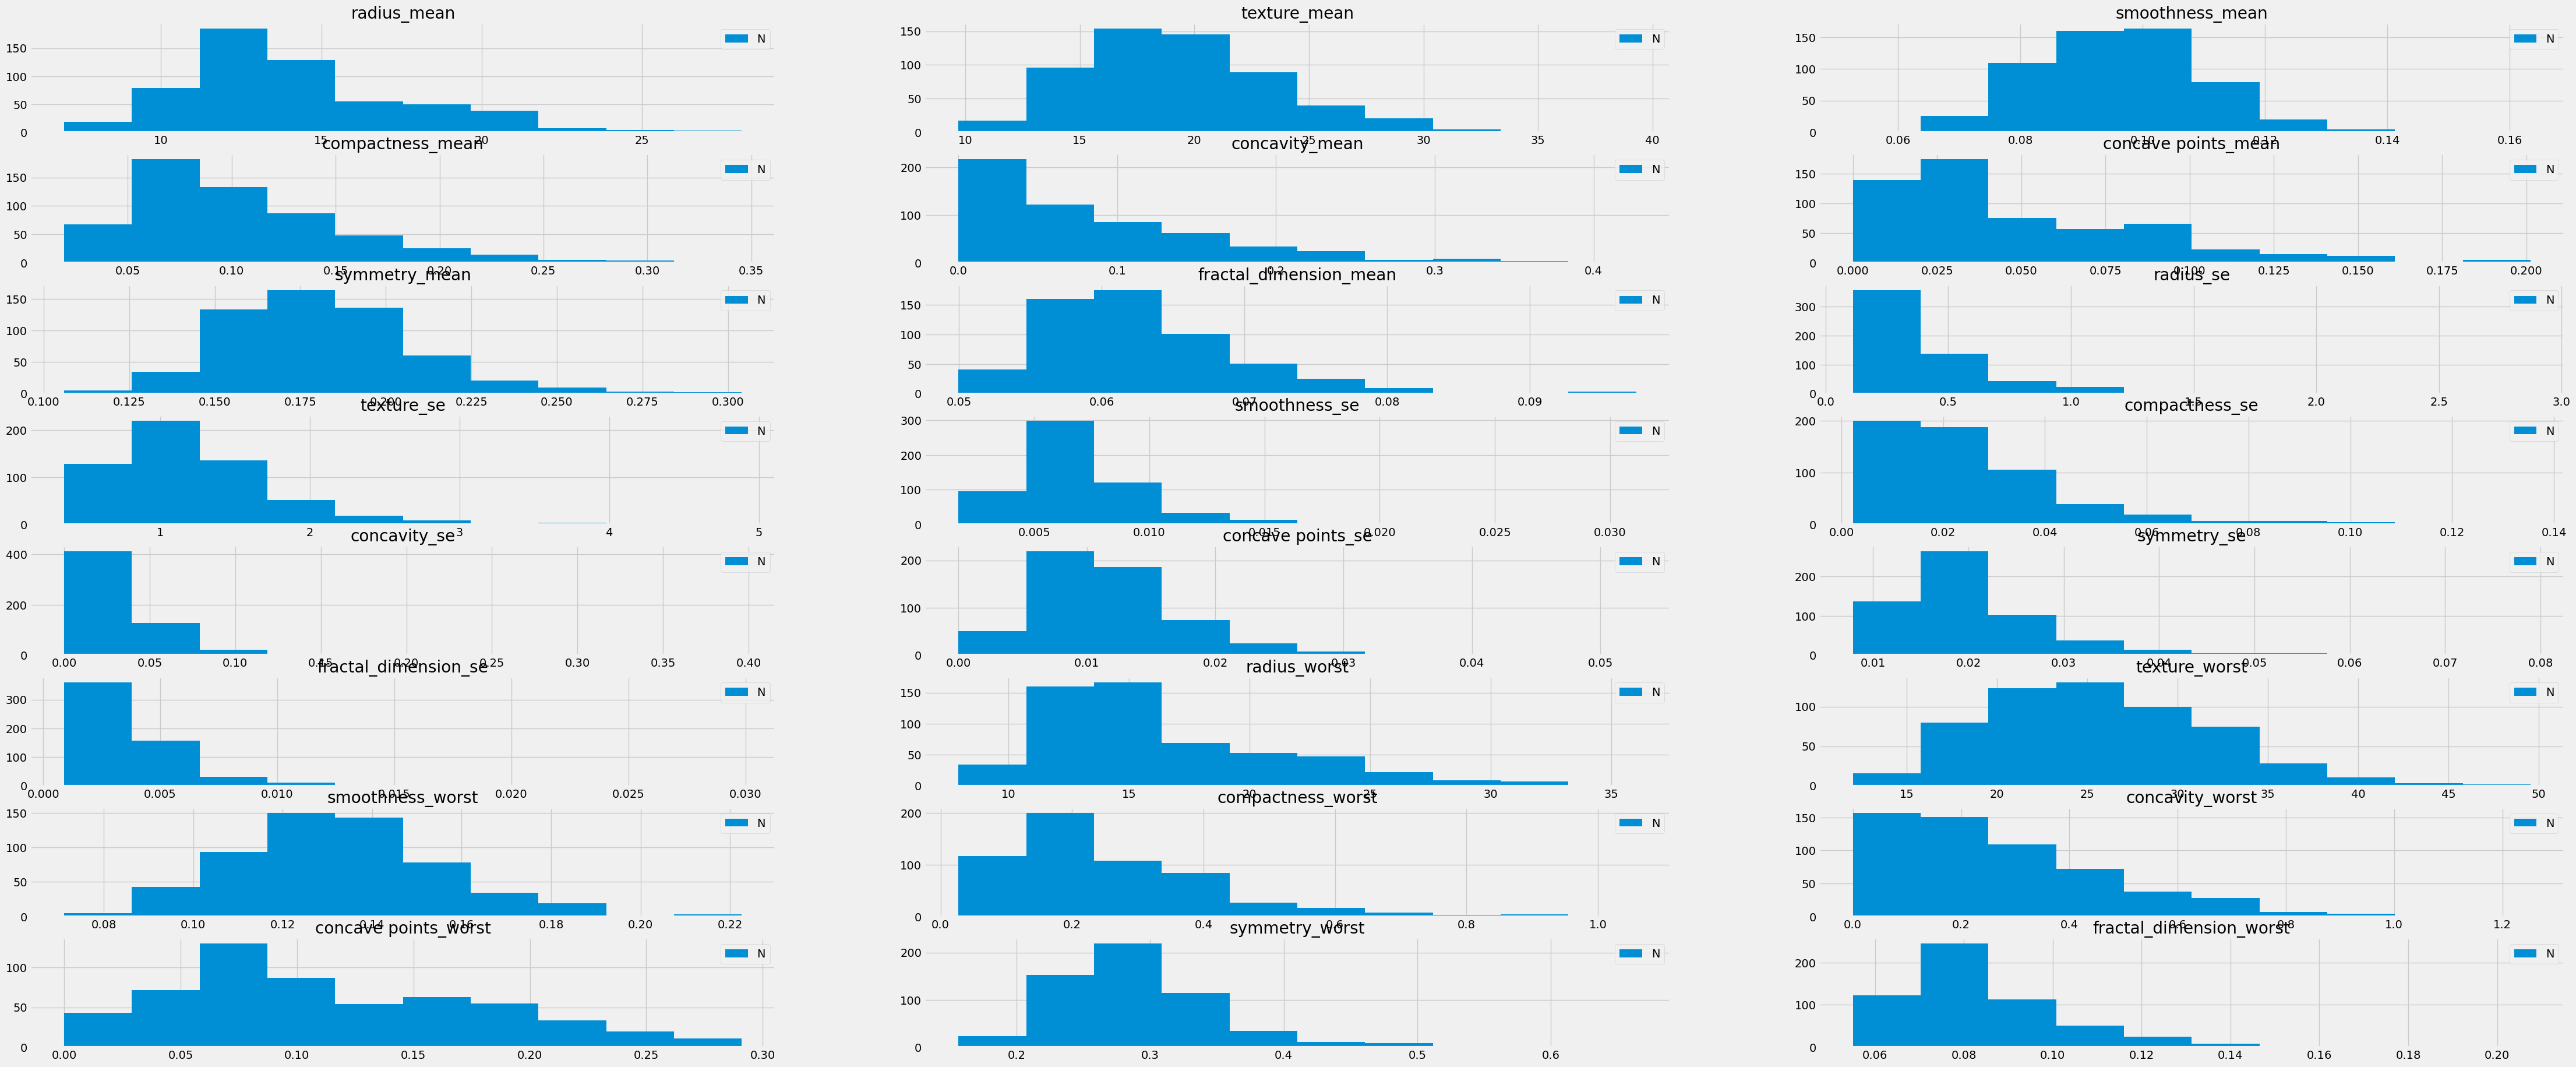

In [72]:
plt.figure(figsize=(50,30))
for i,feature in enumerate(df):
    plt.subplot(11,3,i+1)
    df[feature].hist()
    plt.legend(f'N = {y.value_counts()}')
    plt.title(feature)

## Addressing Class Imbalance

In [73]:
y.value_counts().to_frame().T

diagnosis    B    M
count      357  212

In [74]:
from imblearn.under_sampling import RandomUnderSampler

In [75]:
# Instantiate the undersampler
undersampler = RandomUnderSampler()

# Apply undersampling to your dataset
df_resampled, y_resampled = undersampler.fit_resample(df, y)
y_resampled.value_counts().to_frame().T

diagnosis    B    M
count      212  212

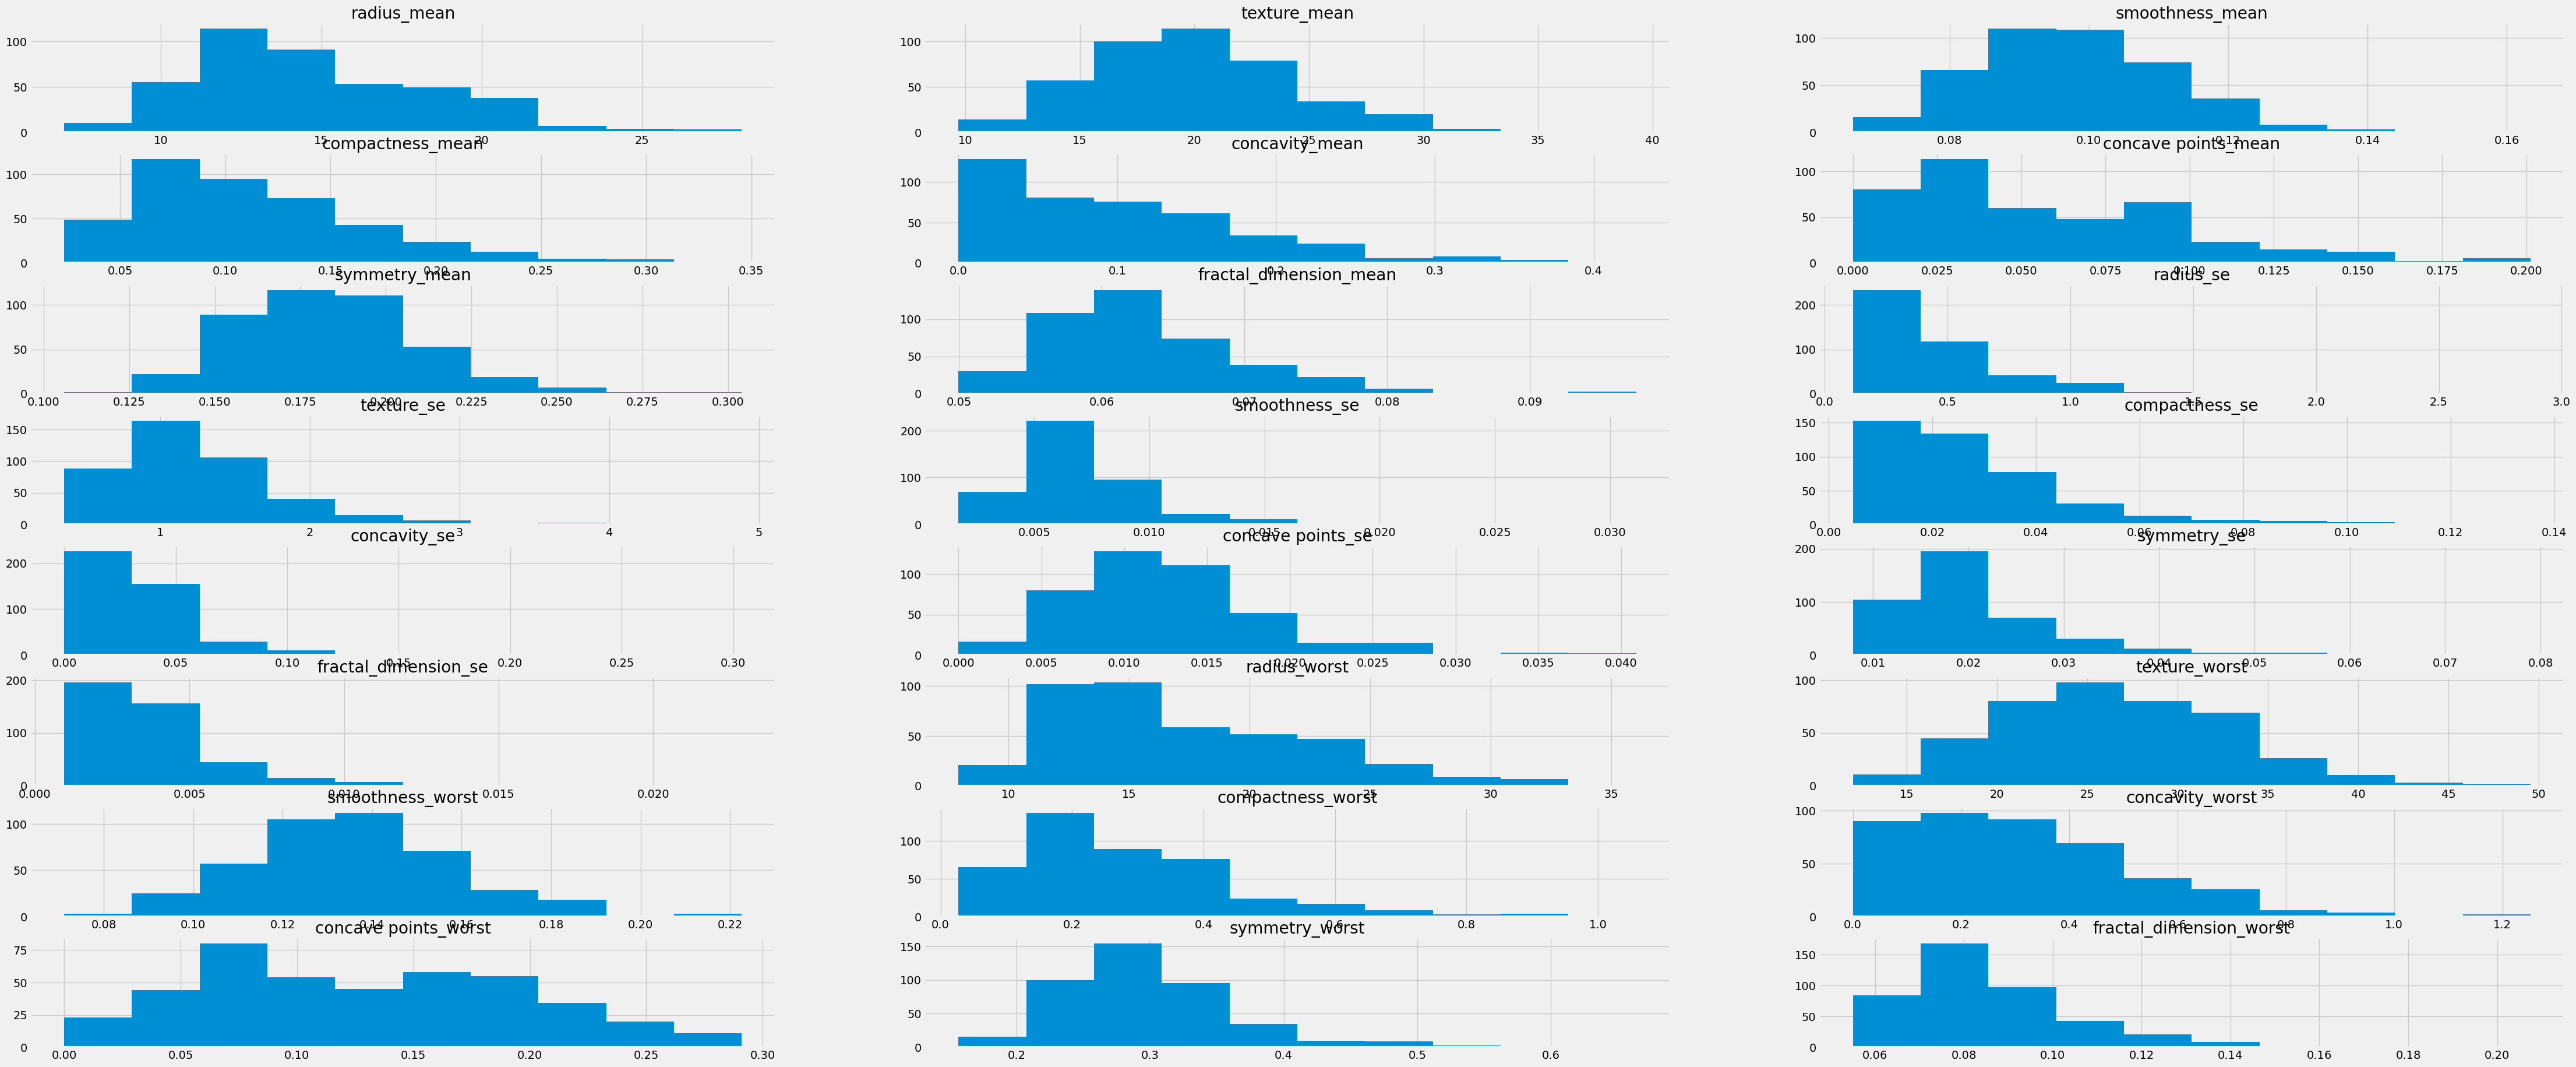

In [76]:
plt.figure(figsize=(50,30))
for i,feature in enumerate(df_resampled):
    plt.subplot(11,3,i+1)
    df_resampled[feature].hist()
    plt.title(feature)

Il y a 24 colonnes dans le dataset


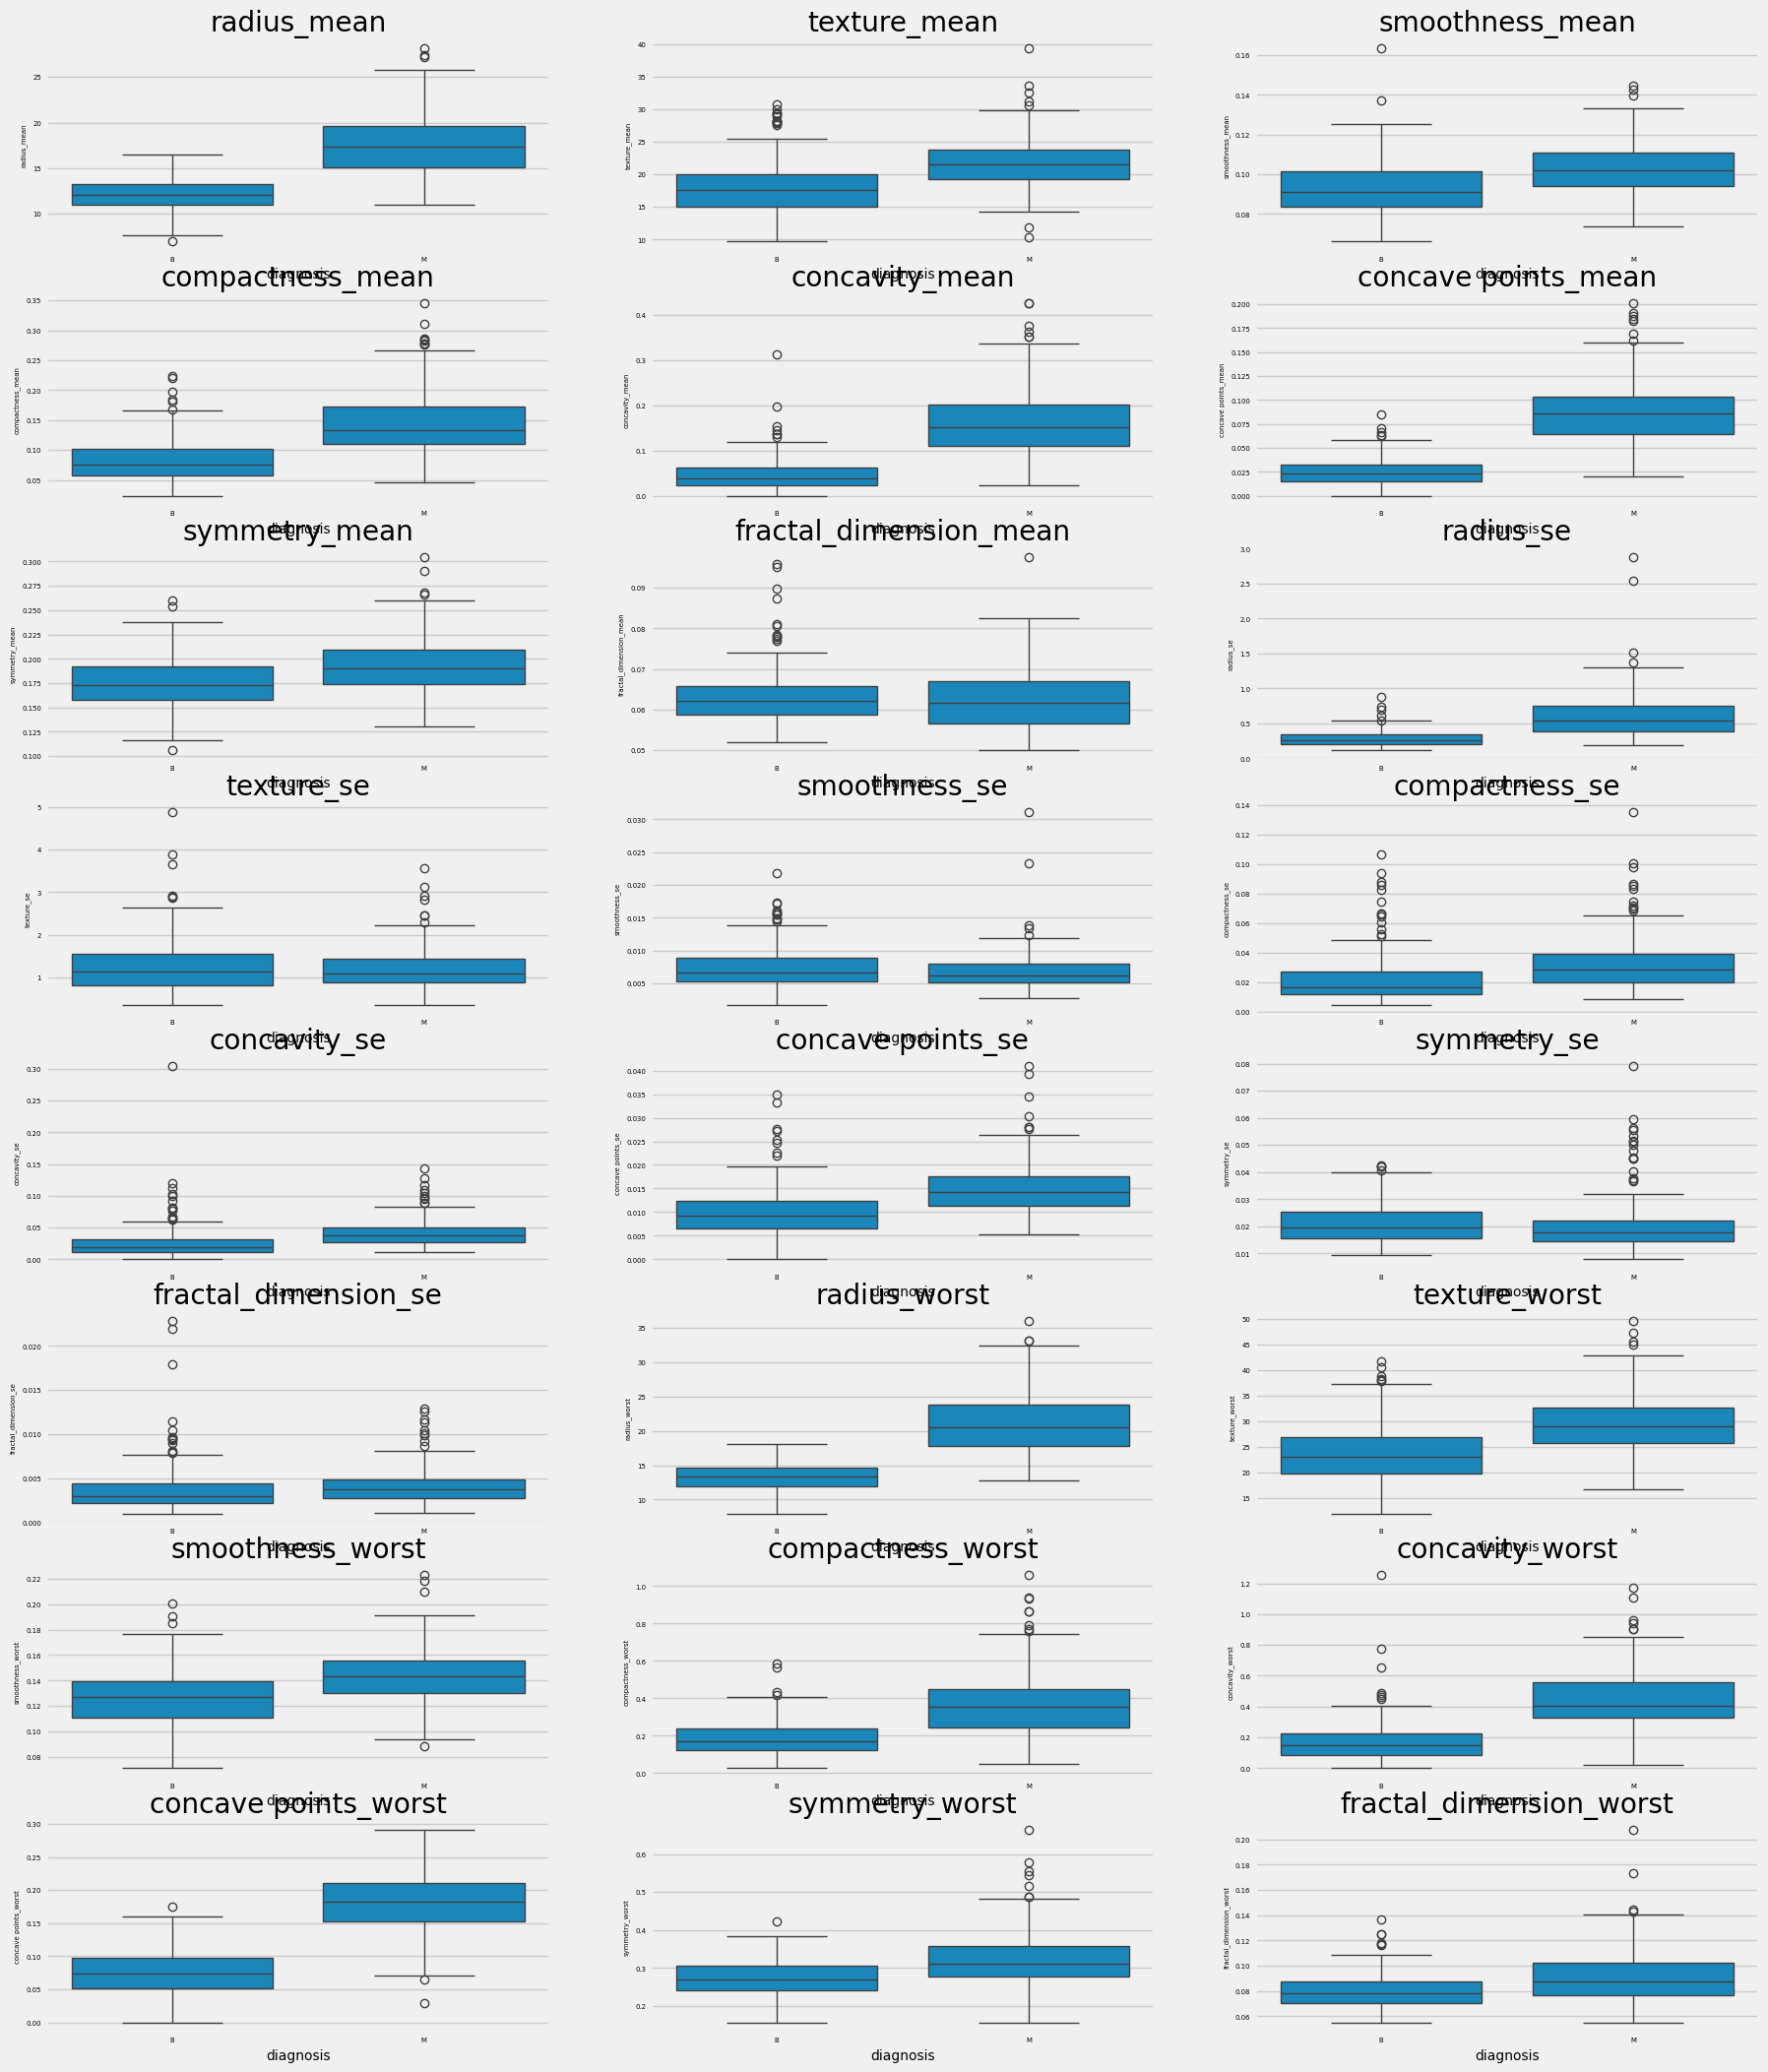

In [ ]:
# I want a comparaison between the resampled data and the original data
fig, axes = plt.subplots(8, 3, figsize=(20, 25))
print(f'Il y a {len(df.columns)} colonnes dans le dataset')
for i, column in enumerate(df.columns[0:len(df.columns)]):
    
    row = i // 3
    col = i % 3
    diag = y_resampled
    sns.boxplot(x=diag, y=column, data=df_resampled, ax=axes[row, col])
    axes[row, col].set_title(f'{column}', fontsize=5)
    axes[row, col].set_xlabel('diagnosis', fontsize=5)
    axes[row, col].set_ylabel(column, fontsize=5)
    axes[row, col].tick_params(labelsize=5)
    

# Feature selection

In [78]:
# Split your data (assuming you haven't split it yet)
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)

# Instantiate the logistic regression model
clf = LogisticRegression(solver='liblinear', max_iter=1000)

# Apply forward feature selection
selector = SequentialFeatureSelector(clf, n_features_to_select=10, direction='forward', cv=5)
selector.fit(X_train, y_train)

# Get the selected feature names
selected_features = X_train.columns[selector.get_support()]

print(f'On a selectionné {len(selected_features)} features')
print("Selected features:", selected_features)

On a selectionné 10 features
Selected features: Index(['smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'fractal_dimension_mean', 'smoothness_se',
       'compactness_se', 'radius_worst', 'concavity_worst',
       'concave points_worst'],
      dtype='object')


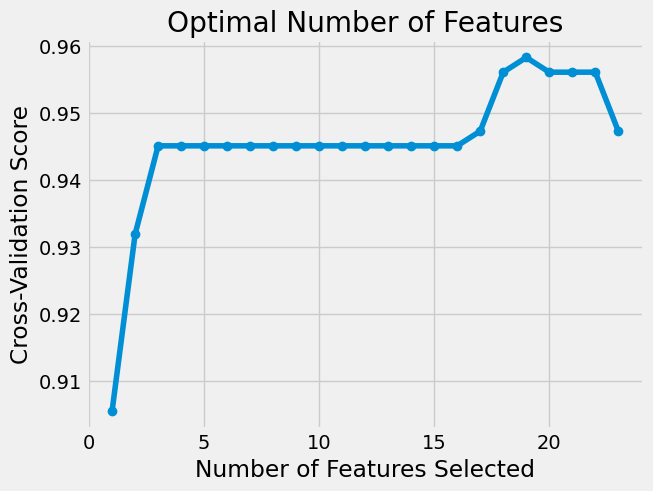

Optimal number of features: 19


In [79]:
# Instantiate the logistic regression model
clf = LogisticRegression(solver='liblinear', max_iter=1000)

# Track performance for each number of features
scores = []
feature_counts = list(range(1, X_train.shape[1] ))

# Loop through each possible number of features
for k in feature_counts:
    selector = SequentialFeatureSelector(clf, n_features_to_select=k, direction='forward', cv=5)
    selector.fit(X_train, y_train)
    # Evaluate model performance with cross-validation
    score = cross_val_score(clf, selector.transform(X_train), y_train, cv=5).mean()
    scores.append(score)

# Plot the results
plt.plot(feature_counts, scores, marker='o')
plt.xlabel('Number of Features Selected')
plt.ylabel('Cross-Validation Score')
plt.title('Optimal Number of Features')
plt.show()

# Find the optimal number of features
optimal_num_features = feature_counts[scores.index(max(scores))]
print("Optimal number of features:", optimal_num_features)

In [80]:
# I want to transform the diagnosis column to 0 and 1
y_resampled = y_resampled.map({'M': 1, 'B': 0})

def forward_selection(X: np.ndarray, 
                     y: np.ndarray, 
                     threshold: float = 0.01) -> Tuple[List[int], List[float]]:

    n_features = X.shape[1]
    selected_features = []
    remaining_features = list(range(n_features))
    scores = []
    current_score = 0
    
    while remaining_features:
        best_score = 0
        best_feature = None
        
        for feature in remaining_features:
            features_to_try = selected_features + [feature]
            X_subset = X[:, features_to_try]
            
            model = LinearRegression()
            model.fit(X_subset, y)
            score = r2_score(y, model.predict(X_subset))
            
            if score > best_score:
                best_score = score
                best_feature = feature
                
        if best_score - current_score > threshold:
            selected_features.append(best_feature)
            remaining_features.remove(best_feature)
            current_score = best_score
            scores.append(current_score)
        else:
            break
            
    return selected_features, scores



In [85]:
# Example usage:
selected, scores = forward_selection(df_resampled.values, y_resampled.values, threshold=0.01)
print("Selected features:", selected)
print("Scores:", scores)

# Je veux le nom des features selectionnées
selected_features = df.columns[selected]
print("Selected features:", selected_features)

Selected features: [21, 16, 17]
Scores: [0.6301168971181843, 0.6813333526633972, 0.7021679030052348]
Selected features: Index(['concave points_worst', 'radius_worst', 'texture_worst'], dtype='object')


In [ ]:
def forward_selection(data, target, metric='r2', max_features=None):
    """
    Perform forward selection to find the best set of features.
    
    Parameters:
        data (pd.DataFrame): The dataset containing all features.
        target (str): The name of the target column.
        metric (str): The evaluation metric ('r2', 'neg_mean_squared_error', etc.).
        max_features (int): Maximum number of features to select. Defaults to all.
        
    Returns:
        list: The selected features.
        pd.DataFrame: DataFrame showing the performance of each step.
    """
    X = data.drop(columns=[target])
    y = data[target]
    
    remaining_features = list(X.columns)
    selected_features = []
    best_scores = []
    scores_dict = []
    
    if max_features is None:
        max_features = len(remaining_features)
    
    for _ in range(max_features):
        best_score = -np.inf if metric in ['r2', 'accuracy'] else np.inf
        best_feature = None
        
        for feature in remaining_features:
            candidate_features = selected_features + [feature]
            X_train, X_test, y_train, y_test = train_test_split(
                X[candidate_features], y, test_size=0.3, random_state=42
            )
            model = LinearRegression()
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            
            # Evaluate the model
            if metric == 'r2':
                score = model.score(X_test, y_test)
            elif metric == 'neg_mean_squared_error':
                score = -mean_squared_error(y_test, y_pred)
            else:
                raise ValueError("Unsupported metric. Use 'r2' or 'neg_mean_squared_error'.")
            
            # Keep track of the best feature
            if (metric == 'r2' and score > best_score) or (metric == 'neg_mean_squared_error' and score < best_score):
                best_score = score
                best_feature = feature
        
        if best_feature is not None:
            selected_features.append(best_feature)
            remaining_features.remove(best_feature)
            best_scores.append(best_score)
            scores_dict.append({'Feature': best_feature, 'Score': best_score})
    
    results = pd.DataFrame(scores_dict)
    return selected_features, results




Selected Features: ['s5', 'bmi', 's1', 'sex', 's2']
Selection Progress:
  Feature     Score
0      s5  0.436024
1     bmi  0.481174
2      s1  0.487836
3     sex  0.490200
4      s2  0.492804


In [ ]:
y_resampled

320   NaN
391   NaN
416   NaN
349   NaN
226   NaN
       ..
563   NaN
564   NaN
565   NaN
566   NaN
567   NaN
Name: diagnosis, Length: 424, dtype: float64